# Исследование рынка заведений общественного питания в Москве

Задача- исседовать рынок заведений общественного питания в Москве, для того чтобы оценить удержание популярности кафе с роботами и в дальнейшем предсказать стоит открывать такой тип кафе или нет.

Для анализа предаставлена таблица rest_data, содержащая следующую информацию:

object_name — название объекта общественного питания;

chain — сетевой ресторан;

object_type — тип объекта общественного питания;

address — адрес;

number — количество посадочных мест.

## 1. Общая информация 

In [1]:
#Для работы с файлом и данными подключим библиотеку pandas 
#Для чтения файла применяем метод pd.read_csv()
#Сохраняем таблицу с гипотезами в переменную rest_data (англ. «данные о ресторане»)
import pandas as pd
rest_data = pd.read_csv('/datasets/rest_data.csv')
#для  изучения общей информации воспольуемся методом info()
rest_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
id             15366 non-null int64
object_name    15366 non-null object
chain          15366 non-null object
object_type    15366 non-null object
address        15366 non-null object
number         15366 non-null int64
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


In [2]:
#проверим общий вид таблицы методом .head()
rest_data.head()

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


Можно отметить,что наименования ресторанов и кафе выглядят довольно произвольно, поэтому проверим, есть ли среди всех заведений общественного питания  один и тот же ресторан, но чуть с измененым именем. Выделим имена методом .unique(), а для того чтобы получить полный список, применим метод  .tolist()

In [3]:
#проверяемые сетевые заведения 
rest_data[rest_data['chain'] == 'да']['object_name'].sort_values().unique().tolist()

['Beverly Hills Diner',
 'Bierloga',
 'Black & White',
 'Bocconcino',
 'BooBo',
 'Bubbleology',
 'Burger Club',
 'COFIX',
 'CORREAS',
 'CoffeeShop',
 'Coffeeshop Company',
 'Cofix',
 'Cookhouse',
 'Correas',
 'Costa Coffee',
 'Deli by Prime Прайм-кафе',
 'Dunkin Donuts',
 'FRIDAYS',
 'Florentini',
 'Fridays KFC',
 'GRAND УРЮК',
 'GlowSubs Sandwiches',
 'Goodman Гудман',
 'Grand Cru',
 'HEALTHY Food',
 'Healthy Food',
 'Healthy food',
 'IL Forno Иль Форно',
 'Jeffreys Coffee',
 'Jeffreys coffee',
 'KFC',
 'KFC Волгоградский',
 'Krispy Creme',
 'Krispy Krem',
 'LAVKALAVKA',
 'Luciano',
 'M Cafe Хинкальная',
 'Maki Maki',
 'Marmalato',
 'Marrakesh Хинкальная',
 'MosKalyan',
 'Movenpick',
 'My box',
 'Osteria Mario',
 'PAUL Поль',
 'PRIME STAR Прайм стар',
 'PRIME Прайм стар Прайм-кафе',
 'Panda Express',
 'Pizengof99 СПБ',
 'Prime Прайм стар',
 'STARBUCKS COFFEE',
 'SUBWAY',
 'Starbucks',
 'Starbucks Старбакс',
 'Starbucks кофе',
 'Starbucks, СТАРБАКС КОФЕ',
 'Starlite Diner',
 'Subway',


In [4]:
#проверяемые несетевые заведения
rest_data[rest_data['chain'] == 'нет']['object_name'].sort_values().unique().tolist()

['1-ЫЙ МОСКОВСКИЙ КАДЕТСКИЙ КОРПУС',
 '1-й МОК',
 '100 личная столовая',
 '100 личное кафе',
 '1001 ночь',
 '100лоФФка',
 '101 вкус',
 '13 RULES',
 '13 RULES KRAFT BEER',
 '13 Rules',
 '15 Kitchen+bar',
 '18 АВТОБУСНЫЙ ПАРК',
 '19bar Atmosphere',
 '1x bet',
 '2-Й АВТОБУСНЫЙ ПАРК',
 "23'00",
 '24 Градуса',
 '259',
 '3 Skovorodki',
 '3 правила',
 '33 пингвина',
 '37-37',
 '44 Чашма',
 '495',
 '5звезд Юг 52',
 '68. ПАУЗА',
 '69 Pints Бар',
 '69 pints',
 '7 Сендвичей',
 '7 злаков',
 '7 сэндвичей-Meating',
 '7717 LOUNGE (Кальянная)',
 '8 OZ Унций',
 '8-ОЙ ТРОЛЛЕЙБУСНЫЙ ПАРК',
 '9 АВТОБУСНЫЙ ПАРК',
 '9bar',
 'ABC Coffee Roasters',
 'ACCENTI',
 'ADRY',
 'AGLOMERAT',
 'AL33 Пиццерия Бар Ботега',
 'ALOHA POKE BAR',
 'AMARSI',
 'AMG',
 'APARTAMENT Пар Бар',
 'AQKitchen',
 'ART PUB',
 'Abbey Players Irish Pub',
 'Absolem',
 'Acai Family',
 'Alex Пекарня',
 'Amande Cafe',
 'Americano Кафе',
 'Amerigos Pizza',
 'Amore Grande',
 'Amore, итальянское мороженое',
 'Amster bar snacks',
 'An Nam',
 'Andi

Также проверим данные на наличие дубликатов в системе.

In [5]:
rest_data[rest_data[['object_name', 'chain', 'object_type', 'address','number']].duplicated(keep = 'first')]

,id,object_name,chain,object_type,address,number
2381,28611,КОМБИНАТ ПИТАНИЯ МГТУ ИМ.Н.Э.БАУМАНА,нет,столовая,"город Москва, 2-я Бауманская улица, дом 5, стр...",100
3481,20914,Буфет Мади,нет,буфет,"город Москва, Ленинградский проспект, дом 64",40
4431,23759,СТОЛОВАЯ ГБОУ города Москвы № 384,нет,буфет,"город Москва, Беловежская улица, дом 67",100
4537,23391,Столовая «Комбинат питания КОСМОС»,нет,столовая,"город Москва, Новозаводская улица, дом 12/11",15
5059,20021,LIFT,нет,кафе,"город Москва, Багратионовский проезд, дом 7, к...",20
...,...,...,...,...,...,...
14578,222932,Старый Баку,нет,кафе,"город Москва, Кировоградская улица, владение 15А",120
14596,204947,Буфет при кинотеатре,нет,буфет,"город Москва, Ореховый бульвар, дом 22А",0
14844,219518,Sushi-Make,нет,предприятие быстрого обслуживания,"город Москва, Ярцевская улица, дом 19",0
15173,218542,Кофе с собой,да,предприятие быстрого обслуживания,"город Москва, Алтуфьевское шоссе, дом 70, корп...",0


### Вывод

Названия ресторанов и улиц содержат как заглавные, так и прописные буквы, поэтому следует привести все строки к одному типу. Затем стоит удалить дубликаты, которые на данный момент составляют меньше одного процента от всех данных 82/15366=0,00005. Также можно отметить,что стоит привести все разновидности наименований одного заведения к одному имени, а также следует привести все схожие рестораны/кафе и тд. к одному типу объекта общественного питания и отношению к сетевому ресторану.

## 2. Предобработка данных

#### Переименование заведений

In [6]:
#методом .lower() приведем все названия к строчному виду
def lower(str):
    return str.lower()
rest_data['object_name']=rest_data['object_name'].apply(lower)
rest_data['address']=rest_data['address'].apply(lower)

На этапе исследования общей информации было выявлено, что один и тот же ресторан находился, как в сетевом бизнесе, так и не сетевом. Чтобы устранить данную ошибку создадим словарь chain_dict, где для каждого сетевого заведения создадим блок всех возможных переименовок, причем отбор делаем и по сетевым и не сетевым ресторанам,чтобы не потерять ни одну запись. Создаем словарь только по сетевым заведения, потому что нам нужно будет получить верную статистику посадочных мест в сетях.

In [7]:
chain_dict={'burger club':['burger club', 'бургер клаб'],
            'белый кролик': ['белый кролик', 'white rabbite (белый кролик)'],
            'bocconcino' : ['bocconcino', 'бокончино'],
            'coffeeshop company':['coffeeshop','coffeeshop company', 'кофешоп coffeeshop company', 'кофешоп компани'],
            'cofix': ['cofix', 'cofix+plombir', 'cofix-bright', 'кофейня cofix', 'кофикс', 'кофейня «cofix»'],
            'costa coffee': ['costa coffee', 'кафе «costa coffee»', 'кофейня «costa coffee»', 'брава коста кофе',
                             'коста кофе', 'кафе коста', 'кофейня кофе коста'],
            'prime cafe':['deli by prime прайм-кафе', 'prime star прайм стар', 'prime прайм стар', 
                          'prime прайм стар прайм-кафе', 'кафе prime прайм стар', 'кафе prime прайм стар прайм-кафе',
                          'кафе «prime» (прайм стар)', 'кафе «prime» прайм стар', 'prime cafe', 'prime',
                          'кафе «прайм стар»', 
                          'прайм', 'прайм стар', 'прайм стар кафе', 'прайм-кафе', 'прайм-кафе прайм стар', 
                          'праймкафе прайм стар', 'праймстар','кафе прайм стар', 'праймстар ресторантс групп'],
            'dunkin donuts': ['dunkin donuts','dunkin donuts (азия box - бургер box)', 'данкин донатс', 
                              'кафе «данкин донатс»'],
            'florentini':['florentini','ресторан «florentini»'],
            'fridays':['fridays', 'tgi fridays'],
            'goodman':['goodman гудман','гудман', 'стейк хаус гудман', 'стейк-хаус гудман', 'ресторан «goodman»'],
            'grand урюк' : ['grand урюк', 'гранд урюк'],
            'kfc':['kfc','kfc волгоградский', 'kfc.', 'ростикс kfc', 'ресторан быстрого питания kfc', 'ресторан kfc',
                   'ресторан «kfc»',  'предприятие быстрого обслуживания «kfc»','пбо «kfc покрышкина»', 'пбо «kfc»',
                   'кафе «kfc»','кафе kfc', 'закусочная kfc', 'закусочная «kfc»', 'кфс амрест', 'ресторан кфс'],
            'krispy kreme' : ['krispy creme', 'krispy krem',  'krispy kreme'],
            'маки маки':['маки-маки', 'maki maki', 'суши «маки-маки»', 'суши бар «маки-маки»', 
                         'ресторан японской кухни «маки-маки»', 'ресторан маки-маки'],
            'moskalyan':['moskalyan', 'кальян-бар moskalyan', 'анти-кафе кальянная «moskalyan»',
                         'кафе «кальянная москальян»', 'кальянная «москальян»', 'москальян'],
            'marrakesh' : ['marrakesh хинкальная','маракеш'],
            'movenpick':['movenpick', 'coffee & waffles & movenpick'],
            'osteria mario':['osteria mario', 'osteria mario+швили', 'остериа марио', 'остерия марио'],
            'paul' :['paul поль', 'paul', 'paul cafe'],
            'dizengof99':['dizengof99'],
            'starbucks':['starbucks', 'starbucks coffee', 'starbucks кофе',  'starbucks старбакс',
                         'starbucks, старбакс кофе', 'старбакс', 'старбакс starbucks', 'старбакс кофе',
                         'кафе starbucks', 'кафе «starbucks»', 'кофейня «старбакс кофе»', 'кофейня «старбакс»',
                         'кафе «старбакс»', 'кафе «кофейня старбакс»', 'старбагс'],
            'subway':['subway', 'сабвей subway', 'кафе «subway»', 'сабвей', 'сабвэй', 'кафе «сабвэй»', 'кафе сабвей'],
            'torro grill':['torro grill торро гриль', 'торро гриль', 'ресторан торро гриль'],
            'travelers coffee':['travelers coffe', 'travelers coffee'],
            'tutti frutti':['tutti frutti', 'кафе мороженного «tutti frutti»', 'тутти фрутти'],
            'upside down':['upside down', 'upside down cake'],
            'vanwok': ['van wok ванвок', 'vanwok ванвок', 'ванвок'],
            'vietcafe':['vietcafe вьеткафе','ресторан«вьеткафе»', 'ресторан «вьеткафе»',  'вьеткафе', 'вьет кафе',
                        'ресторан вьетнамской кухни «вкус вьет»'],
            'wokker':['wokker', 'каффе «wokker»', 'воккер', 'вокер'],
            'лавка братьев караваевых' : ['«кафе «кулинарная лавка братьев караваевых»',
                                          '«кафе «кулинарная лавка братьев караваевых»»',
                                          'кулинарная лавка братьев караваевых',
                                          'кулинарная лавка братьев караваевых братья караваевы',
                                          'кафе «кулинарная лавка братьев караваевых»', 'братья караваевы',
                                          'братья караваевых'],
            'lavkalavka' :['лавкалавка','lavkalavka'],
            'кафе «марукамэ»' : ['кафе «марукамэ»','ресторан «марукамэ»','муракамэ'],
            'азбука вкуса': ['ав-дейли азбука вкуса', 'азбука вкуса', 'бар азбука вкуса'],
            'алло пицца' : ['алло пицца', 'алло пицца 2', 'алло-пицца'],
            'американ сити пицца' : ['американ сити пицца цех по изготовлению пиццы','закусочная «американ сити пицца»', 
                                     'сити пицца' , 'америкэн сити пицца'],
            'андерсон': ['андерсон',  'семейное кафе андерсон', 'семейное кафе и кондитерская «андерсон»',
                         'кафе «андерсон»', 'детский клуб «андерсон»', 'детское кафе «андерсон»'],
            'бакинский бульвар':['бакинский бульвар', 'ресторан «бакинский бульвар»'],
            'бир хаус' : ['бир хаус','бирхаус'],
            'суши wok' :['бар «суши wok»', 'суши wok', 'суши вок', 'сеть магазинов «суши wok»', 'кафе суши wok',
                         'кафе «суши wok»', 'кафе «суши вок»', 'кафе «сушиwok»'],
            'космик': ['бар боулинг-космик',  'семейный ресторан «космик»', 'спорт-бар «космик»', 'ресторан «космик»', 
                       'космик', 'кафе космик','детское кафе «космик»'],
            'мята lounge' : ['бар мята lounge', 'мята', 'мята lounge', 'мята lounge автозаводская', 
                             'мята lounge октябрьская', 'мята lounge шаболовка', 'лаундж-бар «мята lounge»',  
                             'кальян- бар «мята lounge»', 'кальян-бар «мята lounge»', 'кальянная «мята lounge»', 
                             'кальянная мята lounge', 'кафе «мята lounge» кальянный клуб', 'кальянная «мята launge»',
                             'кальянная мята lounge', 'кальян-бар мята lounge', 'мята кальянная', 'мята лаунж'],
            'бар николай' : [ 'бар- буфет «николай»', 'бар-буфет николай', 'николай'],
            'баскин роббинс':['баскин роббинс', 'кафе «баскин роббинс»', 'baskin robbins'],
            'кофе-бин':['кофе бин','кофейня кофе бин'],
            'bb&' : ['бб энд бургерс в&в бургер', 'bb & burgers', 'bb энд burger',  'bb&burgers', 'bbburgers', 
                     'в&в бургер', 'бб и бургерс','ресторан «bb burgers»'],
            'бенто wok': ['бенто wok', 'предприятие быстрого обслуживания «бенто wok»'],
            'бир хаус':['бир хаус', 'бир хаус паб'],
            'pronto' : ['бистро пронто', 'ресторан «пронто»', 'кафе пронто', 'пронто'],
            'бодрый день' : ['бодрый день', 'бодрый день кофе с собой'],
            'брудер': [ 'брудер',  'ресторан «брудер»'],
            'burger king' : ['бургер кинг burger king',  'бургер кинг', 'ресторан «бургер кинг»', 
                             'предприятие быстрого обслуживания «бургер кинг»', 'кафе-закусочная «бургер кинг»',  
                             'кафе бургер кинг', 'кафе «бургер кинг»', 'закусочная «бургер кинг»', 'бурген кинг'],                          
            'бутчер': ['бутчер бизон', 'бутчер', 'buthers стейк бар'],
            'black star' :['black star burger', 'black star burgers', 'блэк стар бургер'],
            'ваби-саби' : [ 'ваби-саби', 'японский ресторан «ваби-саби»',  'кафе «ваби-саби»', 'кафе ваби-саби'],
            'вареничная №1' :['вареничная №1', 'ресторан «вареничная №1»', 'вареничная 1', 'вареничная № 1'],
            'урюк' : ['кафе «урюк» хивинская чайхона', 'урюк', 'урюк вавилова',  'ресторан «урюк»', 
                      'ресторан «чайхана урюк»', 'ресторан «чайхана урюк', 'кафе урюк'],
            'волконский':['волконский',  'кафе-пекарея «волконский»', 'кондитерская волконский',
                          'кондитерская-пекарня волконский',  'кафе волконский пекарня', 'кафе «волконский»',
                          'пекарня «волконский хлеб»', 'пекарня волконский'],
            'восточный базар' : ['восточный базар', 'восточный базар'],
            'виват-пицца' : ['виват пицца'],
            'газпромнефть' : ['газпромнефтьцентр', 'кафе при азс газпромнефть', 'газпром нефть', 'газпромнефть',
                              'газпромнефть кафе',  'кафе при азс «газпромнефть»', 'кафе при азс газпромнефть №134'],
            'генацвале' : ['генацвали', 'генацвале'],
            'милти' : ['готовые блюда милти', 'магазин готовой еды «милти»', 'милти', 'точка продажи готовой еды милти',
                       'предприятие быстрого обслуживания «милти»', 'милти готовые блюда для здорового питания', 
                       'закусочная «mealty»'],
            'хинкальная' : ['хинкальная', 'ресторан хинкальная',  'ресторан «хинкальная»', 'кафе «хинкальная»'],
            'da pino':['да пино',  'да пино (da pino)', 'ресторан «джардино да пино»'],
            'даблби' : ['дабл би', 'дабл би блэк', 'кофейня «дабл би»','даблби', 'даблби кофейня',  'кофейня даблби',
                        'кофейня «даблби»'],
            'де марко' : ['де марко', 'кофейня «де марко»'],
            'джонджоли' : ['джон джоли', 'ресторан джон джоли', 'ресторан «джон джоли»', 'джонджоли'],
            'добрынинский' : ['добрынинский', 'добрынинский и партнёры'],
            'dodopizza' : ['пиццерия «додо пицца»', 'предприятие быстрого обслуживания «додо пицца»', 'додо пицца', 
                           'до до пицца','додопицца', 'пиццерия «додо»',  'пицца «додо»'],         
            'domino,s pizza' : ["домино'с пицца", "домино'с пицца domino,s pizza", "ресторан «домино'с пицца»",
                                "предприятие быстрого обслуживания «домино'с пицца»", "пиццерия «домино'с пицца»", 
                                "кафе «домино'с пицца»",  'domino-s pizza', 'dominos pizza', 'доминос пицца',
                                'ресторан доминос'],
            'дорогая, я перезвоню' : ['дорогая, я перезвоню', 'дорогая я перезвоню'],
            'крошка картошка' : ['закусочная «крошка картошка»', 'ресторан быстрого питания «крошка картошка»',
                                 'предприятие быстрого обслуживания «крошка картошка»',
                                 'предприятие быстрого питания «крошка картошка»',  'крошка картошка',
                                 'кафе «крошка картошка»', 'кафе «крошка-картошка»', 'крошка-картошка', 
                                 'крошкакартошка'],
            'пицца хат' : ['ресторан «пицца хат»',  'пицца хат', 'пиццерия «пицца хат»',  'кафе «пицца хат»', 
                           'закусочная «пицца хат»',  'pizza hut'],
            'stardogs' : ['закусочная «стардогs»',  'стардогs',  'стардогs и шаурма', 'стардогс стардогs', 'стардогс'],
            'сушишоп' : ['сушишоп', 'предприятие быстрого обслуживания «сушишоп»', 'закусочная «сушишоп»'],
            'теремок' : ['закусочная «теремок»',  'теремок', 'теремок инвест', 'теремок-инвест', 
                         'предприятие быстрого обслуживания «теремок»', 'ресторан «теремок»',  'пбо «теремок»',  
                         'кафе теремок', 'кафе «теремок»'],
            'золотая вобла' : ['золотая вобла', 'ресторан «золотая вобла»'],
            'il patio' : ['иль патио', 'иль-патио', 'кафе «иль патио»', 'шикари иль патио',
                          'ресторан «иль патио»', 'кафе иль патио «il patio»', 'il patio', 'il патио'],
            'il patio planeta sushi' : ['иль патио планета суши',  'planeta sushi il patio',  'il патиопланета суши'],
            'il forno' : ['il forno иль форно', 'иль форнетто',  'il fornetto'],
            'илья муромец' : ['илья муромец', 'ресторан «илья муромец»'],
            'каро' : ['каро', 'кафе «каро фильм»', 'кафе «каро-фильм»'],
            'кофе хаус' : ['кафе «кофе хаус»', 'кофейня «кофе хаус»',  'кофе хаус', 'кофе-хаус', 'кофе хаус,экспресс',
                           'кофе хаус. экспрессо и капучино бар', 'кафе кофе-хаус'],
            'кружка' : ['кафе «кружка»', 'паб кружка', 'кружка'],
            'кулинарное бюро' : ['кафе «кулинарное бюро»',  'кулинарное бюро', 'кулинарное бюро kitchen', 
                                 'кулинарное бюро китчен'],
            'макдоналдс' : ['ресторан«макдоналдс»',  'предприятие быстрого обслуживания «макдоналдс»', 
                            'ресторан «макдоналдс»','москва - макдоналдс',  'макдоналдс',  'кафе макдоналдс', 
                            'кафе «макдоналдс»'],
            'меленка' : ['кафе «меленка»',  'меленка'],
            'менза' : ['кафе «менза»', 'менза'],
            'му-му' : ['кафе «му-му»',  'кафе быстрого питания му-му', 'кафе му-му', 'му-му', 'кафе «му му»',
                       'кафе му му'],
            'нияма' : ['нияма', 'нияма- суши бар', 'кафе «нияма»'],
            'нияма и пицца пи' :['нияма пицца пи', 'нияма. пицца пи'],
            'папа джонс' : ['кафе «папа джонс»',  'пицерия «папа джонс»', 'пиццерия «папа джонс»', 'пиццерия папа джонс',
                            'папа джонс', 'папа джонс пицца', 'пицерия папа джонс'],
            'пицца pomodoro': ['пицца pomodoro','пицца помодоро'],
            'пицца фабрика' : ['кафе «пицца фабрика»', 'пицца фабрика', 'пицца-фабрика'],
            'поль бейкери' : ['кафе «поль бейкери»', 'поль бейкери'],
            'суши сет' : ['кафе «суши сет»', 'суши сет', 'магазин-кулинария «суши сет»'], 
            'тануки' : ['кафе «тануки»', 'тануки', 'ресторан «тануки»', 'ресторан тануки'],
            'тапчан' : ['кафе «тапчан»',  'кафе «чайхана тапчан»', 'тапчан'],
            'то да се' : ['кафе «то да сё»', 'то да сё'],
            'хлеб насущный' : ['кафе «хлеб насущный»', 'хлеб насущный', 'кафе пекарня «хлеб насущий»'],
            'шоколадница' : ['кафе «шоколадница»',  'шоколадница',  'кофейня «шоколадница»', 'кофейня шоколадница',
                             'шоколадница экспресс'],
            'штолле' : ['кафе «штолле»', 'кафе штолле',  'штолле', 'пироги штолле', 'пироговая штолле'],
            'якитория' : ['кафе «якитория»', 'кафе якитория', 'якитория', 'ресторан «якитория»'],
            'кофе тун' : ['кафе кофе тун', 'кофе тун'],
            'кофемания' : ['кофемания', 'кафе кофемания'],
            'хачапури' : ['кафе пекарня хачапури', 'хачапури'],
            'лукойл' : ['кафе при азс', 'кафе при азс лукойл', 'лукойл', 'лукойл-центрнефтьпродукт', 'кафе лукойл',
                        'лукоил', 'лукойл'],
            'bp' : ['кафе при азс «bp»', 'bp'],
            'рецептор' : ['кафе рецептор', 'рецептор', 'кафе «рецептор»'],
            'чайхона №1' : ['кафе чайхона №1', 'чайхона №1', 'чайхона №1 бутово', 'ресторан «чайхона №1»',
                            'кафе «чайхона»'],
            'шоколад' : ['шоколад', 'кафе шоколад'],
            'колбасофф' : ['колбасофф', 'ресторан «колбасофф»'],
            'тирольские пироги' : [ 'кондитерия тирольские пироги', 'тирольские пироги'],
            'тарас бульба' : ['корчма «тарас бульба»', 'корчма тарас бульба', 'ресторан «корчма тарас бульба»',
                              'корчма«тарас бульба»', 'корчматарас бульба'],
            'кофепорт': ['кофепорт',  'coffee port', 'кофейня «кофепорт»'],
            'магбургер' : ['магбургер', 'магбургер азс №16', 'магбургер азс №17', 
                           'предприятие быстрого обслуживания «магбургер»'],
            'metro cash&curry' : ['cash&curry', 'метро к&к'],
            'мимино' : ['мимино', 'мимино хинкальная'],
            'мск московская сеть кальянных' : ['мск московская сеть кальянных',
                                               'мск московская сеть кальянных на шаболовке',
                                               'московская сеть кальянных мск'],
            'ньокки' : ['ньокки', 'ресторан «ньокки»'],
            'пилзнер' : ['пилзнер', 'чешская пивная «пилзнер»', 'чешская пивная пилзнер'],
            'пицца паоло' : ['пицца «паоло»', 'пицца паоло', 'пиццерия «пицца паоло»', 
                             'пункт общественного питания без зала обслуживания пицца «паоло»', 'пиццерия паоло', 
                             'паоло', 'пица паоло'],
            'pizza express 24' : ['пицца экспресс', 'pizza express', 'pizza 24 express', 'пицца экспрес'],
            'piu del cibo' : ['piu del cibo', 'пиццерия пиу дель чибо'],
            'планета суши' : ['планета суши', 'ресторан «планета суши»'],
            'ikea' : ['пончиковое кафе икеа ikea', 'ресторан икеа ikea'],
            'темпл бар' : ['ресторан «темпл бар»', 'темпл бар', 'темпл бар'],
            'территория' : ['ресторан «территория»', 'территория', 'территория ясенево'],
            'ян примус' : ['ресторан «ян примус»', 'ян примус'],
            'ёрш' : ['ресторан «ёрш»','ёрш'],
            'советские времена' : ['советские времена', 'советские времена чебуречная ссср', 'чебуречная ссср',
                                   'чебуречная «советские времена»'],
            'старина мюллер' : ['старина мюллер старина миллер', 'старина миллер'],
            'порто мальтезе' : ['порто мальтезе','порто мальтеза'],
            'роснефть' : ['роснефть', 'роснефть (закрытое)'],
            'шантимель' : ['шантимель', 'шантимель (кондитерские)', 'французская кондитерская шантимель «art dessert»',
                           'французская кондитерская'],
            'хлеб&co' : ['хлеб и co', 'хлеб&co'],
            'чешская пивная «козловица»' : ['чешская пивная козловица', 'чешская пивная «козловица»'],
            'крепери де пари' : ['крепери де пари', 'французская блинная «крепери де пари»']}

In [8]:
#Проводим замену названий заведений. В столбец 'object_name_new' вставим верные названия сетевых рестаранов,
#а тех что в списке не было поставим None 
def new_chain_name(name):
    for key, value in chain_dict.items():
        if name in value: 
            return key        
rest_data['object_name_new'] =rest_data['object_name'].apply(new_chain_name)
#В столбец 'object_name_right' соберем все названия объектов, если мы провоили замену имени,
#то берем новое, а если не было замены, то старое имя
def rename_chain_name(line):
    new=line['object_name_new']
    old=line['object_name']
    if new is None: 
        return old
    else:
        return new
rest_data['object_name_right'] =rest_data.apply(rename_chain_name, axis=1)
#удаляем старый столбеци 'object_name' и промежуточный 'object_name_new'
rest_data = rest_data.drop(['object_name','object_name_new'], axis=1)
rest_data

,id,chain,object_type,address,number,object_name_right
0,151635,нет,кафе,"город москва, улица егора абакумова, дом 9",48,сметана
1,77874,нет,кафе,"город москва, улица талалихина, дом 2/1, корпус 1",35,родник
2,24309,нет,кафе,"город москва, абельмановская улица, дом 6",95,кафе «академия»
3,21894,да,кафе,"город москва, абрамцевская улица, дом 1",40,пиццетория
4,119365,нет,кафе,"город москва, абрамцевская улица, дом 9, корпус 1",50,кафе «вишневая метель»
...,...,...,...,...,...,...
15361,208537,да,кафе,"город москва, 3-й крутицкий переулок, дом 18",50,шоколадница
15362,209264,да,кафе,"город москва, улица земляной вал, дом 33",10,шоколадница
15363,209186,да,кафе,"город москва, улица земляной вал, дом 33",20,шоколадница
15364,221900,да,кафе,"город москва, поселение московский, киевское ш...",36,шоколадница


#### Удаление дубликатов

In [9]:
# Отбираем индексы строк, которые содержат дубликаты
index_dubli=rest_data[rest_data[['object_name_right', 'chain', 'object_type', 'address','number']].duplicated(keep = 'first')].index
#Очищаем данные от данных строк, cоздав срез по индексам дубликатов с отрицанем. 
rest_data=rest_data[~rest_data.index.isin(index_dubli)].reset_index(drop=True)
rest_data

,id,chain,object_type,address,number,object_name_right
0,151635,нет,кафе,"город москва, улица егора абакумова, дом 9",48,сметана
1,77874,нет,кафе,"город москва, улица талалихина, дом 2/1, корпус 1",35,родник
2,24309,нет,кафе,"город москва, абельмановская улица, дом 6",95,кафе «академия»
3,21894,да,кафе,"город москва, абрамцевская улица, дом 1",40,пиццетория
4,119365,нет,кафе,"город москва, абрамцевская улица, дом 9, корпус 1",50,кафе «вишневая метель»
...,...,...,...,...,...,...
15276,208537,да,кафе,"город москва, 3-й крутицкий переулок, дом 18",50,шоколадница
15277,209264,да,кафе,"город москва, улица земляной вал, дом 33",10,шоколадница
15278,209186,да,кафе,"город москва, улица земляной вал, дом 33",20,шоколадница
15279,221900,да,кафе,"город москва, поселение московский, киевское ш...",36,шоколадница


Ушло  85 дубликатов, а значит ещё 3 дубликата добавилось при работе с наименованиями.

#### Замена принадлежности к сети

In [10]:
#группируем данные по имени, считаем сколько из этих рестаранов относятся к сетевому ресторану, а сколько нет
type_chain=pd.pivot_table(rest_data, index='object_name_right', columns='chain', values='id', aggfunc='count')
#fillna(0) заполнит пропуски 0 
type_chain = type_chain.fillna(0)
type_chain.columns=['chain_yes','chain_no']
type_chain= type_chain.reset_index()
#создаем функцию, которая будет возвращать принадлежность к сети 
def chain(line):
    yes=line['chain_yes']
    no=line['chain_no']
    if yes>no:
        return 'да'
    return 'нет'
type_chain['chain_new']=type_chain.apply(chain, axis=1)

In [11]:
#прверяем работу функции
type_chain[type_chain['object_name_right']=='il patio']

,object_name_right,chain_yes,chain_no,chain_new
560,il patio,36.0,5.0,да


In [12]:
#Добавляем столбец 'chain_new' в rest_data при помощи merge() по колонке 'object_name_right'
#удаляем старый стобец методом .drop(['chain'], axis=1)
rest_data = rest_data.merge(type_chain[['object_name_right', 'chain_new']], on='object_name_right').drop(['chain'], axis=1)
rest_data

,id,object_type,address,number,object_name_right,chain_new
0,151635,кафе,"город москва, улица егора абакумова, дом 9",48,сметана,нет
1,77874,кафе,"город москва, улица талалихина, дом 2/1, корпус 1",35,родник,нет
2,24309,кафе,"город москва, абельмановская улица, дом 6",95,кафе «академия»,нет
3,21894,кафе,"город москва, абрамцевская улица, дом 1",40,пиццетория,да
4,135770,кафе,"город москва, дубнинская улица, дом 53, корпус 1",25,пиццетория,да
...,...,...,...,...,...,...
15276,214437,предприятие быстрого обслуживания,"город москва, большая тульская улица, дом 13",10,суши тун,да
15277,205739,кафе,"город москва, город зеленоград, панфиловский п...",30,пицца паоло и бенто wok,да
15278,25452,кафе,"город москва, 1-я тверская-ямская улица, дом 21",65,кофемания starbucks,да
15279,211435,предприятие быстрого обслуживания,"город москва, проспект мира, дом 211, корпус 2",50,fridays kfc,да


#### Определение типа объекта общественного питания

In [13]:
#группируем данные по имени, считаем сколько из этих рестаранов относятся к определнному типу заведения
object_type=pd.pivot_table(rest_data, index='object_name_right', columns='object_type', values='id', aggfunc='count')
#fillna(0) заполнит пропуски 0 
object_type = object_type.fillna(0)
object_type.columns=['бар','буфет','закусочная', 'кафе', 'кафетерий', 'магазин (отдел кулинарии)',
                     'предприятие быстрого обслуживания', 'ресторан', 'столовая']
#object_type= object_type.reset_index()
#создаем функцию, которая будет возвращать принадлежность к типу заведения 
def type_(line): 
    t=max(line)
    for name in line.index:
        if t == line[name]:
            return name
object_type['object_type_new']=object_type.apply(type_, axis=1)
object_type= object_type.reset_index()

In [14]:
#прверяем работу функции
object_type[object_type['object_name_right']=='il patio']

,object_name_right,бар,буфет,закусочная,кафе,кафетерий,магазин (отдел кулинарии),предприятие быстрого обслуживания,ресторан,столовая,object_type_new
560,il patio,1.0,0.0,0.0,9.0,0.0,0.0,0.0,31.0,0.0,ресторан


In [15]:
#Добавляем столбец 'object_type_new' в rest_data при помощи merge() по колонке 'object_name_right'
#удаляем старый стобец методом .drop(['object_type'], axis=1)
rest_data = rest_data.merge(object_type[['object_name_right', 'object_type_new']], on='object_name_right').drop(['object_type'], axis=1)
rest_data

,id,address,number,object_name_right,chain_new,object_type_new
0,151635,"город москва, улица егора абакумова, дом 9",48,сметана,нет,кафе
1,77874,"город москва, улица талалихина, дом 2/1, корпус 1",35,родник,нет,кафе
2,24309,"город москва, абельмановская улица, дом 6",95,кафе «академия»,нет,кафе
3,21894,"город москва, абрамцевская улица, дом 1",40,пиццетория,да,кафе
4,135770,"город москва, дубнинская улица, дом 53, корпус 1",25,пиццетория,да,кафе
...,...,...,...,...,...,...
15276,214437,"город москва, большая тульская улица, дом 13",10,суши тун,да,кафе
15277,205739,"город москва, город зеленоград, панфиловский п...",30,пицца паоло и бенто wok,да,кафе
15278,25452,"город москва, 1-я тверская-ямская улица, дом 21",65,кофемания starbucks,да,кафе
15279,211435,"город москва, проспект мира, дом 211, корпус 2",50,fridays kfc,да,предприятие быстрого обслуживания


И ,наконец, проверяем снова таблицу на наличие дубликатов после обработки данных.

In [16]:
rest_data[rest_data[['object_name_right', 'chain_new', 'object_type_new', 'address','number']].duplicated(keep = 'first')]

,id,address,number,object_name_right,chain_new,object_type_new
294,102007,"город москва, большая семёновская улица, дом 16",5,кафе,нет,кафе
1555,28607,"город москва, 2-я бауманская улица, дом 5, стр...",16,комбинат питания мгту им.н.э.баумана,нет,столовая
2856,217037,"город москва, ярцевская улица, дом 25а",0,кофе с собой,да,предприятие быстрого обслуживания
3968,26290,"город москва, ленинский проспект, дом 68/10",88,il patio,да,ресторан
9293,95104,"город москва, шарикоподшипниковская улица, дом...",60,лиор,нет,кафе
9855,214844,"город москва, кутузовский проспект, дом 57",0,tutti frutti,нет,кафе
12900,194828,"город москва, улица сущёвский вал, дом 5, стро...",2,каменев василий владимирович,нет,кафе
12984,207883,"город москва, большая черкизовская улица, дом 125",0,пунк питания,нет,кафе
13298,173417,"город москва, комсомольская площадь, дом 6, со...",0,fresh bar,нет,бар
14155,193751,"город москва, краснопресненская набережная, до...",70,кафе «экспомил»,нет,кафе


Получили ещё 10 дубликатов, которые также стоит устранить.

In [17]:
# Отбираем индексы строк, которые содержат дубликаты
index_dubli=rest_data[rest_data[['object_name_right', 'chain_new', 'object_type_new', 'address','number']].duplicated(keep = 'first')].index
#Очищаем данные от данных строк, cоздав срез по индексам дубликатов с отрицанем. 
rest_data=rest_data[~rest_data.index.isin(index_dubli)].reset_index(drop=True)
# Переименновываем столбцы
rest_data.columns=['id', 'address', 'number', 'name', 'chain', 'type']
rest_data

,id,address,number,name,chain,type
0,151635,"город москва, улица егора абакумова, дом 9",48,сметана,нет,кафе
1,77874,"город москва, улица талалихина, дом 2/1, корпус 1",35,родник,нет,кафе
2,24309,"город москва, абельмановская улица, дом 6",95,кафе «академия»,нет,кафе
3,21894,"город москва, абрамцевская улица, дом 1",40,пиццетория,да,кафе
4,135770,"город москва, дубнинская улица, дом 53, корпус 1",25,пиццетория,да,кафе
...,...,...,...,...,...,...
15266,214437,"город москва, большая тульская улица, дом 13",10,суши тун,да,кафе
15267,205739,"город москва, город зеленоград, панфиловский п...",30,пицца паоло и бенто wok,да,кафе
15268,25452,"город москва, 1-я тверская-ямская улица, дом 21",65,кофемания starbucks,да,кафе
15269,211435,"город москва, проспект мира, дом 211, корпус 2",50,fridays kfc,да,предприятие быстрого обслуживания


### Вывод

Были устранены все дубликаты, названия сетевых ресторанов приведены к одному имени, а также были установлены единные типы объектов и отношения к сетевому бизнессу.

### 3. Анализ данных

#### 3.1. Исследование видов объектов общественного питания по количеству

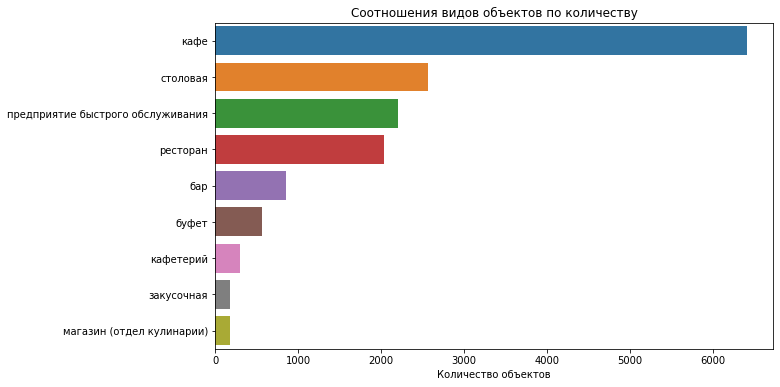

In [18]:
#Группируем данные по типу вида объекта и считаем колличество объектов в каждом
type_rest=rest_data.groupby('type').agg({'id':'count'}).sort_values('id', ascending=False).reset_index()
#Переименуем 'id' в 'count'
type_rest=type_rest.rename(columns={'id':'count'})
#Для работы с графиками импортируем  matplotlib.pyplot
import matplotlib.pyplot as plt 
#для построения продвинутых графиков импортируем библиотеку seaborn
import seaborn as sns 
#задаём графическую область 
fig, ax = plt.subplots(figsize=(10, 6))
ax = sns.barplot(y='type', x="count", data=type_rest)
ax.set_title('Соотношения видов объектов по количеству')
ax.set_xlabel('Количество объектов')
ax.set_ylabel('')
plt.show()

#### Вывод

Самым популярным видом заведения общественного питания является кафе, также достаточно популярнымы можно считать столовые и предприятия быстрого обслуживания.

#### 3.2. Исследование соотношения сетевых и несетевых заведений по количеству

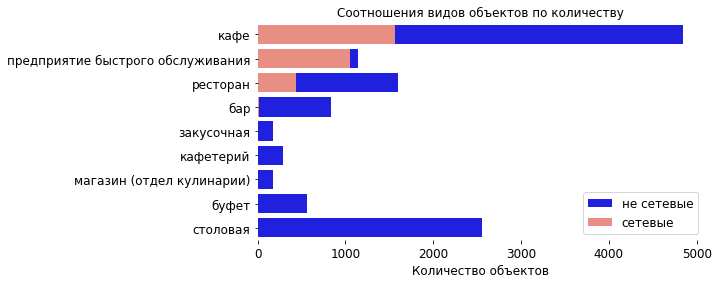

In [19]:
#Находим число объектов,принадлежавших определенному виду,которых входят в сеть
type_rest_chain=rest_data[rest_data['chain']=='да'].groupby('type').agg({'id':'count'}).sort_values('id', ascending=False).reset_index()
type_rest_chain=type_rest_chain.rename(columns={'id':'count_chain'})
#Находим число объектов,принадлежавших определенному виду,которые не входят в сеть
type_rest_withoutchain=rest_data[rest_data['chain']=='нет'].groupby('type').agg({'id':'count'}).sort_values('id', ascending=False).reset_index()
type_rest_withoutchain=type_rest_withoutchain.rename(columns={'id':'count_no_chain'})
#Группируем данные в единую таблицу с разбивкой по принадлежности к сети
type_rest_with_chain=type_rest_chain.merge(type_rest_withoutchain, how='outer', on='type').fillna(0)
fig, ax =  plt.subplots(figsize=(8 , 4))
#Строим распределение не сетевых объектов
sns.barplot(y='type', x="count_no_chain", data= type_rest_with_chain, label= "не сетевые",  color='blue') 
#Строим распределение сетевых объектов
sns.barplot(y='type', x="count_chain",  data= type_rest_with_chain, label= "сетевые",  color='salmon') 
ax.legend(ncol= 1, loc="lower right", fontsize=12) 
ax.set_ylabel("")
ax.set_xlabel('Количество объектов',fontsize=12)
ax.set_title('Соотношения видов объектов по количеству',fontsize=12)
plt.tick_params(axis='both', which='major', labelsize=12)
sns.despine(left = True, bottom = True) 

In [20]:
type_rest_with_chain

,type,count_chain,count_no_chain
0,кафе,1562.0,4840
1,предприятие быстрого обслуживания,1052.0,1145
2,ресторан,439.0,1593
3,бар,21.0,834
4,закусочная,6.0,177
5,кафетерий,6.0,294
6,магазин (отдел кулинарии),4.0,173
7,буфет,2.0,565
8,столовая,0.0,2558


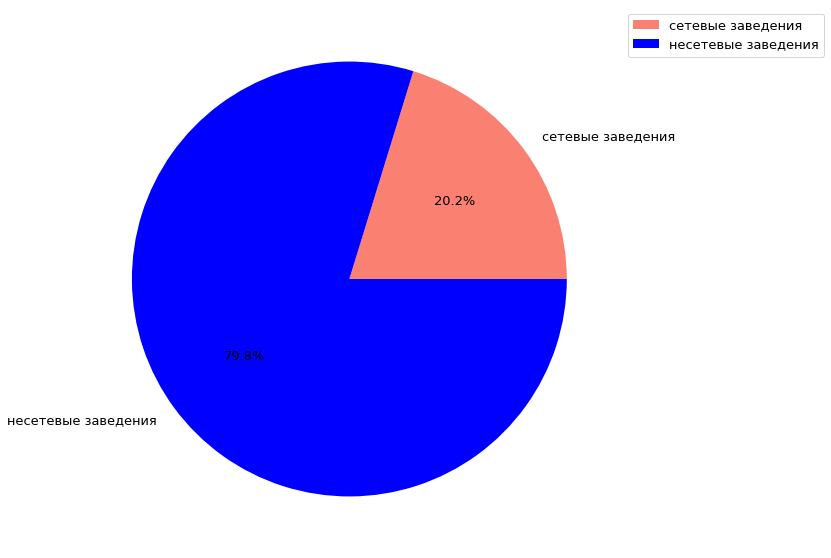

In [21]:
#построим круговую диаграмму, чтобы показать отношение сетевых к несетевым заведениям
fig, ax = plt.subplots(figsize=(10,10))
label=['сетевые заведения','несетевые заведения']
sm_colors = ['salmon', 'blue']
chain=[type_rest_with_chain['count_chain'].sum(),type_rest_with_chain['count_no_chain'].sum()]
ax.pie(chain, radius=1, autopct='%1.1f%%',colors=sm_colors, labels=label, textprops={'fontsize': 13})
ax.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0), fontsize=13)

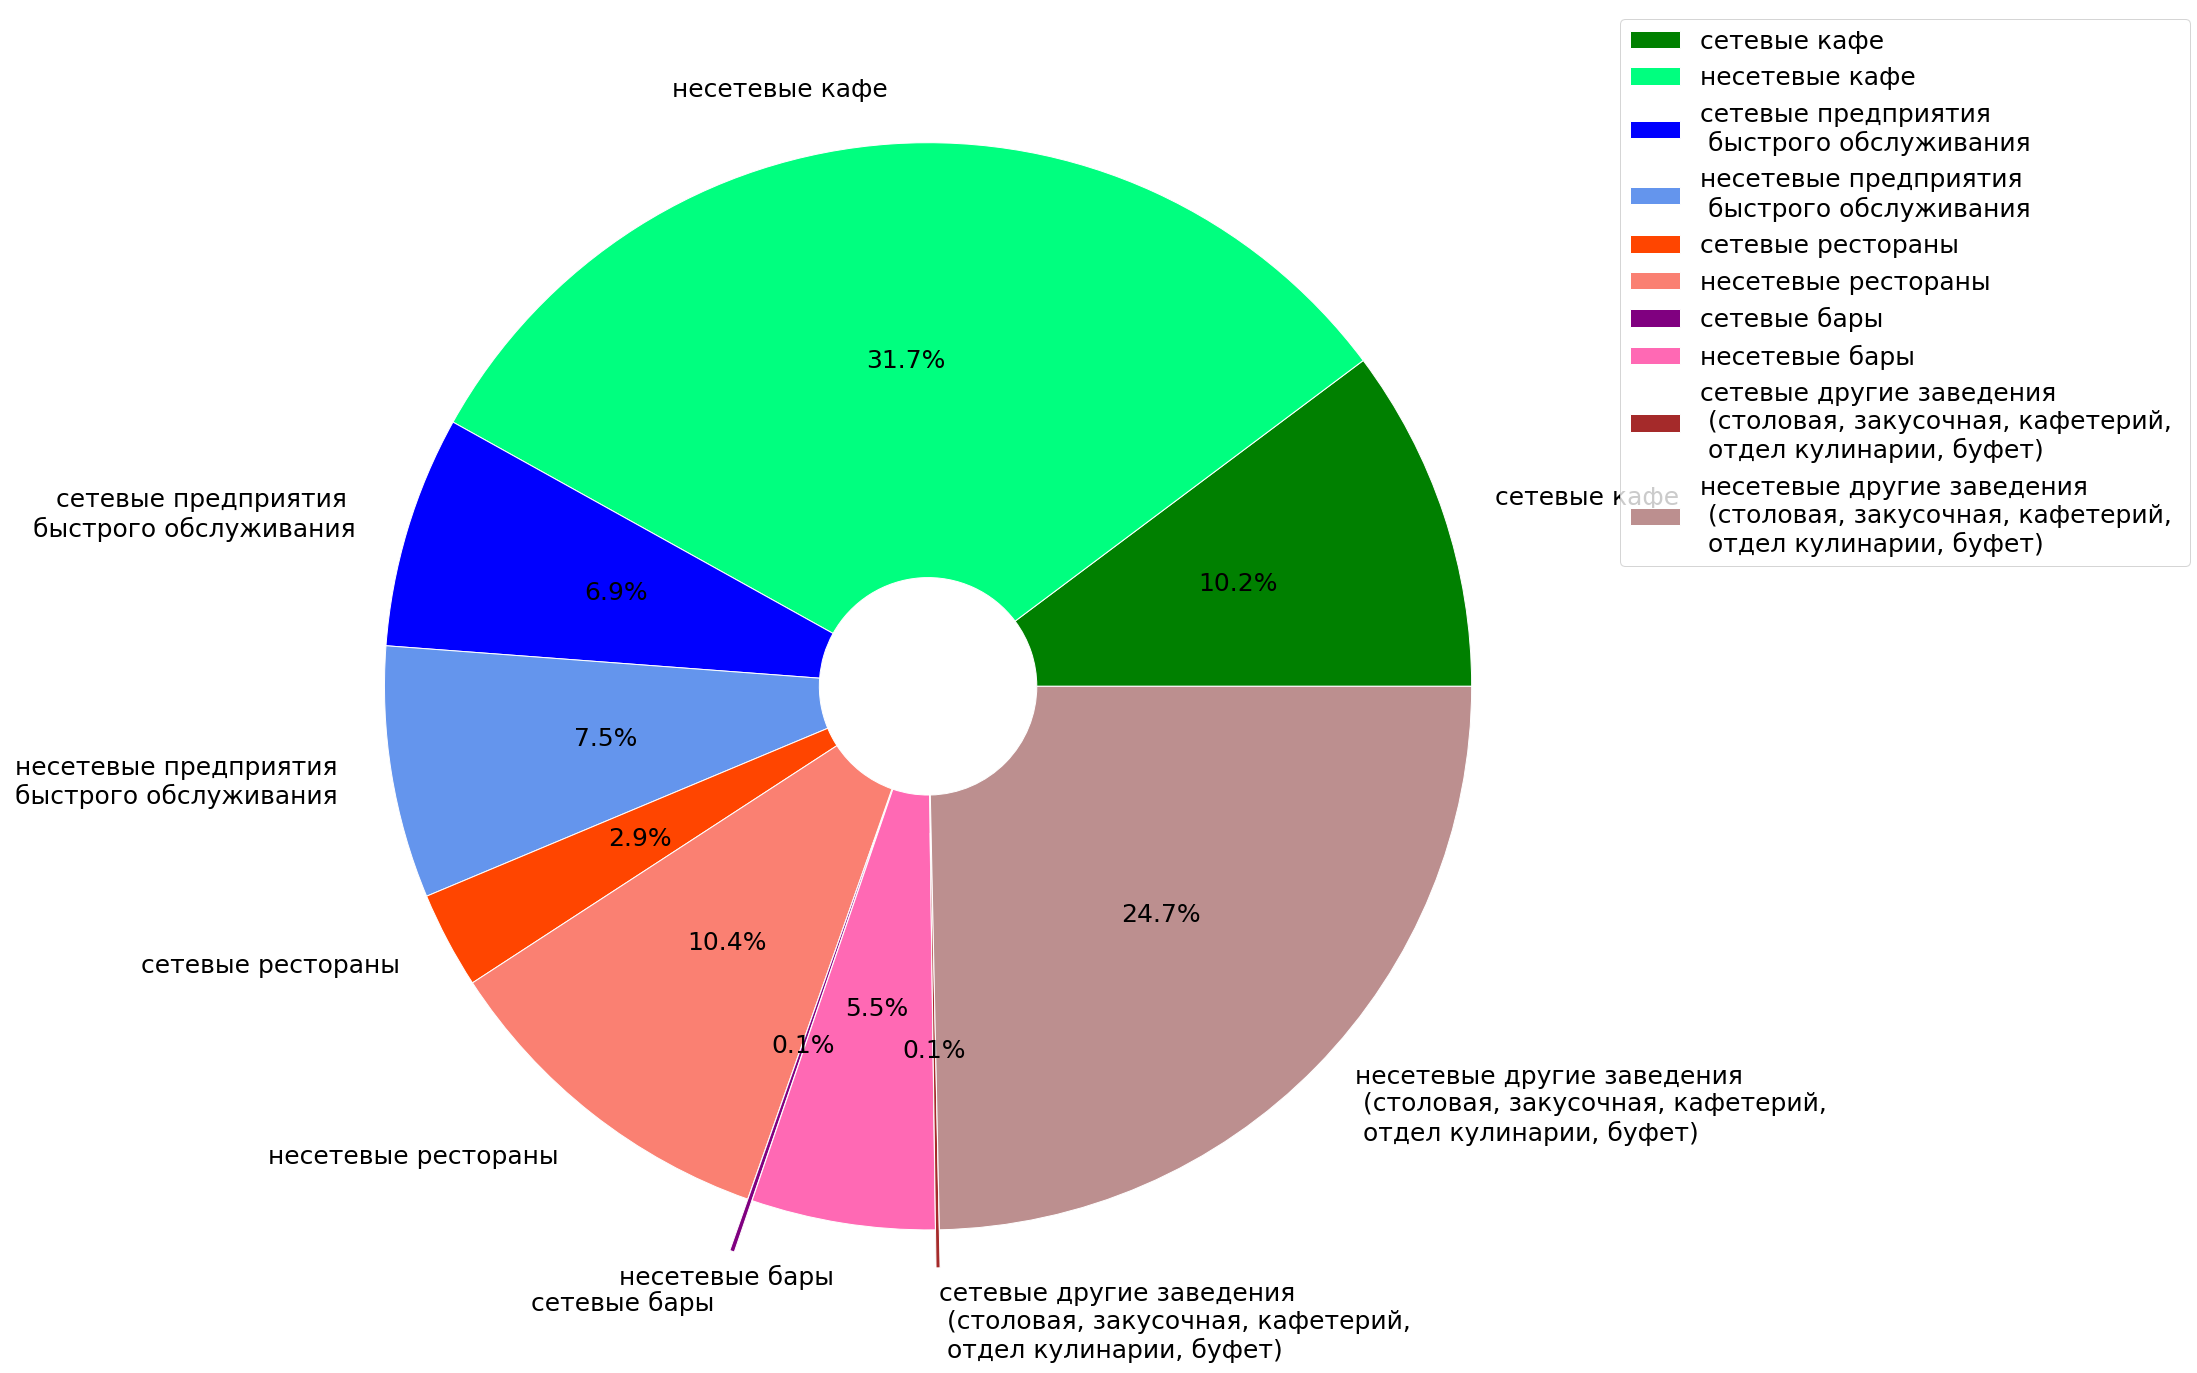

In [22]:
#построим круговую диаграмму, где доли- сетевые/несетевые заведения для каждого вида
pies=[[1.562e+03, 4.840e+03],
       [1.052e+03, 1.145e+03],
       [4.390e+02, 1.593e+03],
       [2.100e+01, 8.340e+02],
       [18.000e+00, 3.767e+03]]
import numpy as np
pies=np.array(pies)
fig, ax = plt.subplots(figsize=(25,25))
offset=0.8
label_hue=['сетевые кафе','несетевые кафе','сетевые предприятия \n быстрого обслуживания', 'несетевые предприятия\n быстрого обслуживания','сетевые рестораны','несетевые рестораны','сетевые бары','несетевые бары','сетевые другие заведения \n (столовая, закусочная, кафетерий, \n отдел кулинарии, буфет)','несетевые другие заведения \n (столовая, закусочная, кафетерий, \n отдел кулинарии, буфет)']
sm_colors = ['green', 'springgreen', 'blue', 'cornflowerblue','orangered', 'salmon',  'purple', 'hotpink', 'brown', 'rosybrown']
explode_in = (0, 0, 0, 0, 0,0, 0.1,0, 0.07, 0)
ax.pie(pies.flatten(), radius=1, colors=sm_colors,wedgeprops=dict(width=offset, edgecolor='w'),explode=explode_in, autopct='%1.1f%%', labels=label_hue, textprops={'fontsize': 25})
ax.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0), fontsize=25)

#### Вывод

Несетевых объектов питания намного больше, чем сетевых. Чаще всего объектами общественного питания, которым  характерно сетевое распространение, являются кафе, предприятия быстрого обслуживания и рестораны, в то время как для несетевых характерны столовые, кафе и рестораны. Различие типов объектов в тройке лидеров связаны с тем,что столовые- государственные организации, а следовательно весь их объём приходится на несетевой тип, хотя и предприятия быстрого обслуживания также наблюдаются в достаточном большом количестве при коммерческом бизнесе. 

#### 3.3. Описание характера сетевых заведений

In [23]:
#Чтобы описать характер сетевых заведений, группируем данные по имени сетевого заданияи находим самые большие сети из них 
top_rest_chain=rest_data[rest_data['chain']=='да'].groupby('name').agg({'id':'count'}).sort_values('id', ascending=False).head(6)
top_rest_chain

,id
name,
kfc,191
шоколадница,187
макдоналдс,172
burger king,162
теремок,114
"domino,s pizza",111


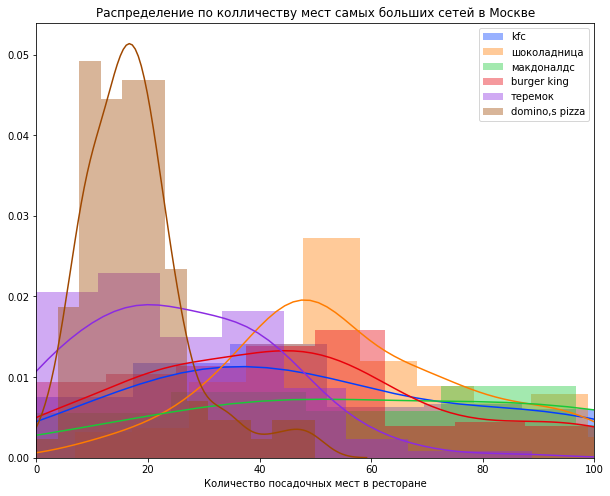

In [24]:
#строим рапсределение при помощи метода distplot, чтобы рассмотреть количество посадочных мест в каждой из топовых сетей
sns.set_palette("bright")
fig, ax =  plt.subplots(figsize=(10 , 8))
for rest in top_rest_chain.index:
    sns.distplot(rest_data[rest_data['name']==rest]['number'], label=rest)
ax.legend(loc="upper right") 
ax.set(ylabel= "" , xlabel= 'Количество посадочных мест в ресторане')
ax.set_title('Распределение по колличеству мест самых больших сетей в Москве')  
ax.set_xlim(xmin=0, xmax=100)  
plt.show()    

#### Вывод

Для сетевых заведений характерно много заведений с небольшим числом посадочных мест: от 20 до 60 мест.

#### 3.4. Вид объекта, у которого  в среднем самое большое количество посадочных мест

In [25]:
#Группируем данные по типу вида объекта и считаем среднее колличество посадочных мест в каждом
number_rest=rest_data.pivot_table(index='type', values='number', aggfunc=['median'])
number_rest.columns=['median']
number_rest_median=number_rest.sort_values('median', ascending=False).reset_index()
number_rest_median

,type,median
0,столовая,103
1,ресторан,80
2,бар,35
3,буфет,34
4,кафе,30
5,кафетерий,6
6,предприятие быстрого обслуживания,6
7,закусочная,3
8,магазин (отдел кулинарии),0


(0, 400)

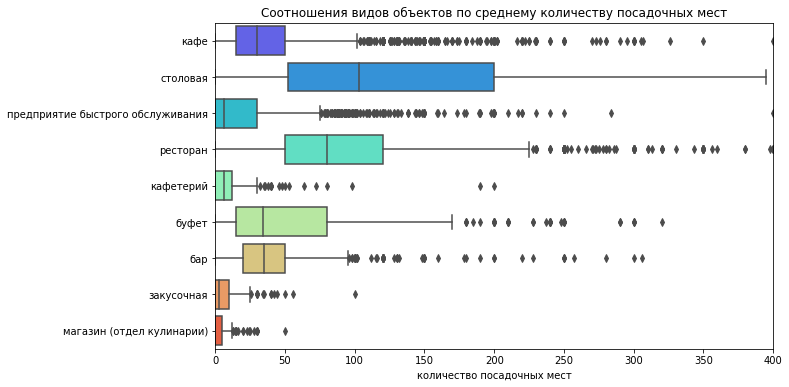

In [26]:
#строим sns.boxplot, который покажет разброс мест в каждом виде заведений общественного питания
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(x="number", y="type",data=rest_data, palette='rainbow', orient='h')
ax.set_title('Соотношения видов объектов по среднему количеству посадочных мест')
ax.set_xlabel('количество посадочных мест')
ax.set_ylabel('')
ax.set_xlim(0,400)

#### Вывод

В среднем самое большое количество посадочных мест наблюдается в столовых и ресторанах. Не смотря на большую распространенность кафе, данный тип заведения занимает лишь 5 место и содержит в среднем около 40 посадочных мест, и только 4% процента от всех заведений кафе имеют более 100 мест.

#### 3.5. топ-10 улиц по количеству объектов общественного питания и определение районов Москвы с этими улицами

Для нахождения улиц создадим регулярное выражение:

"\\,-\\,"  - мы ищем выражение заключенное между запятыми, так как обычно улица идет не первая, а после населенных пунктов   

[а-яА-Я0-9\ё\Ё] - будет находить слова, которые начинаются с любой буквы, а также цифры 

"-№ - учитывать эти знаки в словах

\s-любой пробельный символ (пробел, табуляция, конец строки и т.п.)

"+" - брать сколько угодно символов

?- Ноль или одно вхождение выражения 

(площадь|улица|переулок|шоссе|набережная|проезд|тупик|проспект|бульвар|линия|аллея|просек|километр|территория|микрорайон|город зеленоград)-интересующее нас выражение

In [27]:
#создаём  1 патерн хранщий наше главное регулярное выражение
pattern1='\,(([а-яА-Я0-9\-ё\-Ё\s"№]+)?(площадь|улица|переулок|шоссе|набережная|проезд|тупик|проспект|бульвар|линия|аллея|просек|километр|территория|микрорайон|квартал|город зеленоград)([а-яА-Я0-9\-ё\s"№]+)?)\,'
#чтобы достать нужное выражение, применяем функцию .str.extract(pat = pattern1)[0], сохраняем в 'streetnorm'
rest_data['streetnorm'] = rest_data['address'].str.extract(pat = pattern1)[0]
#заполняем пропуски ''
rest_data['streetnorm']=rest_data['streetnorm'].fillna('')
#проверяем количество пропущенных строк
rest_data[rest_data['streetnorm']=='']['address']

155      город москва, поселение щаповское, деревня тро...
235      город москва, поселение десеновское, деревня д...
236      город москва, поселение филимонковское, деревн...
237      город москва, поселение краснопахорское, село ...
330            улица ленинская слобода, дом 26, строение 5
                               ...                        
14555                таганская площадь, дом 88, строение 4
14565       шарикоподшипниковская улица, дом 5, строение 1
15113    город москва, поселение сосенское, посёлок газ...
15229    город москва, поселение воскресенское, посёлок...
15245    город москва, поселение десеновское, деревня в...
Name: address, Length: 184, dtype: object

In [28]:
rest_data[rest_data['streetnorm']==' город зеленоград'].head()

,id,address,number,name,chain,type,streetnorm
114,184184,"город москва, город зеленоград, корпус 118",8,суши wok,да,кафе,город зеленоград
201,158133,"город москва, город зеленоград, корпус 1805",156,тануки,да,ресторан,город зеленоград
506,162722,"город москва, город зеленоград, корпус 435а",3,кафетерий,нет,кафетерий,город зеленоград
517,174635,"город москва, город зеленоград, георгиевский п...",8,кафетерий,нет,кафетерий,город зеленоград
593,150652,"город москва, город зеленоград, новокрюковская...",23,"domino,s pizza",да,кафе,город зеленоград


Все записи в городе Зеленограде были выделены, как "город зеленоград", однако часть адресов содержит улицы, а часть адресов это просто корпуса, поэтому для нахождения адресов с улицами при Зеленограде создаём отдельный патр. 

In [29]:
pattern2='\,(\s(город зеленоград, )+([а-яА-Я0-9\-ё\-Ё\s"№]+)?(площадь|улица|переулок|шоссе|набережная|проезд|тупик|проспект|бульвар|линия|аллея|просек|километр|территория|микрорайон|квартал)([а-яА-Я0-9\-ё\s"№]+)?)\,'
#чтобы достать нужное выражение, применяем функцию .str.extract(pat = pattern)[0], сохраняем в 'streetnorm'
rest_data['streetzelen'] = rest_data['address'].str.extract(pat = pattern2)[0]
#заполняем пропуски ''
rest_data['streetzelen']=rest_data['streetzelen'].fillna('')
#создаём функцию, которая будет заменять в стобце, выделенных улиц, 'город зеленоград' на название улицы в нём
#, иначе просто оставляем 'город зеленоград'
def housing(row):
    if (row['streetnorm']==' город зеленоград') and (row['streetzelen']==''):
        return row['streetnorm']
    elif (row['streetnorm']==' город зеленоград') and (row['streetzelen']!=''):
        return row['streetzelen'].split(',')[1]   
    else:
        return row['streetnorm']
rest_data['street rihgt'] = rest_data.apply(housing, axis=1)    
#проверяем количество пропущенных строк
rest_data[rest_data['street rihgt']=='']['address']

155      город москва, поселение щаповское, деревня тро...
235      город москва, поселение десеновское, деревня д...
236      город москва, поселение филимонковское, деревн...
237      город москва, поселение краснопахорское, село ...
330            улица ленинская слобода, дом 26, строение 5
                               ...                        
14555                таганская площадь, дом 88, строение 4
14565       шарикоподшипниковская улица, дом 5, строение 1
15113    город москва, поселение сосенское, посёлок газ...
15229    город москва, поселение воскресенское, посёлок...
15245    город москва, поселение десеновское, деревня в...
Name: address, Length: 184, dtype: object

Делаем проверку замены названия.

In [30]:
rest_data.loc[114,:]

id                                                  184184
address         город москва, город зеленоград, корпус 118
number                                                   8
name                                              суши wok
chain                                                   да
type                                                  кафе
streetnorm                                город зеленоград
streetzelen                                               
street rihgt                              город зеленоград
Name: 114, dtype: object

In [31]:
rest_data.loc[517,:]

id                                                         174635
address         город москва, город зеленоград, георгиевский п...
number                                                          8
name                                                    кафетерий
chain                                                         нет
type                                                    кафетерий
streetnorm                                       город зеленоград
streetzelen               город зеленоград, георгиевский проспект
street rihgt                                георгиевский проспект
Name: 517, dtype: object

Есть адреса,которые сразу начинались с улицы, поэтому аналогично рассуждениям выше создаём отдельный патр с условием,что делаем проверку с первого символа: "^-начало строки"

In [32]:
pattern3='^(([а-яА-Я0-9\-ё\s№"]+)?(площадь|улица|переулок|шоссе|набережная|проезд|тупик|проспект|бульвар|линия|аллея|просек|километр|территория|микрорайон|квартал)([а-яА-Я0-9\-ё\s\w"№]+)?)\,'
rest_data['streetbegin'] = rest_data['address'].str.extract(pat = pattern3)[0]
def begin(row):
    if row['street rihgt'] == '':
        return row['streetbegin']   
    else:
        return row['street rihgt']
rest_data['street_final'] = rest_data.apply(begin, axis=1) 
rest_data['street_final']=rest_data['street_final'].fillna('')
#деламе проверку
rest_data[rest_data['street_final']=='']['address']

155      город москва, поселение щаповское, деревня тро...
235      город москва, поселение десеновское, деревня д...
236      город москва, поселение филимонковское, деревн...
237      город москва, поселение краснопахорское, село ...
365      город москва, поселение сосенское, посёлок ком...
                               ...                        
14409    город москва, поселение краснопахорское, село ...
14413    город москва, поселение сосенское, посёлок ком...
15113    город москва, поселение сосенское, посёлок газ...
15229    город москва, поселение воскресенское, посёлок...
15245    город москва, поселение десеновское, деревня в...
Name: address, Length: 121, dtype: object

In [33]:
#проверяем оставшиеся адреса 
index=rest_data[rest_data['street_final']==''].index
for i in index:
    print(rest_data.loc[i,'address'])

город москва, поселение щаповское, деревня троицкое, дом 47б
город москва, поселение десеновское, деревня десна, дом 144уч
город москва, поселение филимонковское, деревня верхнее валуево, дом 21а
город москва, поселение краснопахорское, село красная пахра, дом 8
город москва, поселение сосенское, посёлок коммунарка, дом 20а
город москва, поселение марушкинское, вблизи деревни крекшино, дом 14б/н
город москва, поселение сосенское, деревня сосенки, дом 55а
город москва, поселение сосенское, деревня сосенки, дом 126
город москва, поселение сосенское, деревня сосенки, дом 73
город москва, поселение сосенское, посёлок коммунарка, дом 30
город москва, поселение щаповское, деревня троицкое, дом 2б
город москва, поселение воскресенское, деревня ямонтово, владение 71
город москва, поселение десеновское, деревня ватутинки, дом 34
город москва, поселение сосенское, посёлок коммунарка, дом 30
город москва, поселение московский, деревня говорово, дом 1б/н
город москва, поселение московский, деревня

Остались только адреса различных поселений без указания улиц, поэтому для таких записей выделим из полного адреса название деревни.

In [34]:
pattern4='\,(([а-яА-Я0-9\-ё\-Ё\s"№]+)?(деревня|село|посёлок|вблизи)([а-яА-Я0-9\-ё\s"№]+)?)\,'
rest_data['streetvil'] = rest_data['address'].str.extract(pat = pattern4)[0]
def vil(row):
    if row['street_final'] == '':
        return row['streetvil']   
    else:
        return row['street_final']
rest_data['street'] = rest_data.apply(vil, axis=1)   
rest_data[rest_data['street'].isna()]['address']


11067    город москва, поселение щаповское, вблизи пос....
Name: address, dtype: object

Осталось 1 адресс, который можно просто убрать. 

In [35]:
# Отбираем индексы строк, которые содержат дубликаты
index_bad=rest_data[rest_data['street'].isna()].index
#Очищаем данные от данных строк, cоздав срез по индексам дубликатов с отрицанем. 
rest_data=rest_data[~rest_data.index.isin(index_bad)]
#мы обработали все адреса, поэтому очистим промежуточные стобцы и взглянем на получившуюся таблицу
rest_data=rest_data.drop(['streetnorm','street rihgt','streetbegin','street_final','streetvil'], axis=1).reset_index(drop=True)
# удаляем лишние пробелы
rest_data['street']=rest_data['street'].str.strip()
rest_data

,id,address,number,name,chain,type,streetzelen,street
0,151635,"город москва, улица егора абакумова, дом 9",48,сметана,нет,кафе,,улица егора абакумова
1,77874,"город москва, улица талалихина, дом 2/1, корпус 1",35,родник,нет,кафе,,улица талалихина
2,24309,"город москва, абельмановская улица, дом 6",95,кафе «академия»,нет,кафе,,абельмановская улица
3,21894,"город москва, абрамцевская улица, дом 1",40,пиццетория,да,кафе,,абрамцевская улица
4,135770,"город москва, дубнинская улица, дом 53, корпус 1",25,пиццетория,да,кафе,,дубнинская улица
...,...,...,...,...,...,...,...,...
15265,214437,"город москва, большая тульская улица, дом 13",10,суши тун,да,кафе,,большая тульская улица
15266,205739,"город москва, город зеленоград, панфиловский п...",30,пицца паоло и бенто wok,да,кафе,"город зеленоград, панфиловский проспект",панфиловский проспект
15267,25452,"город москва, 1-я тверская-ямская улица, дом 21",65,кофемания starbucks,да,кафе,,1-я тверская-ямская улица
15268,211435,"город москва, проспект мира, дом 211, корпус 2",50,fridays kfc,да,предприятие быстрого обслуживания,,проспект мира


#### Подготовка файла для выделения районов улиц и адрессов.
    
Одна улица может принадлежать сразу нескольким районам, поэтому работа велась напрямую с полным адресом объектов общественного питания. Создадим файл словарь: адрес заведения- район места нахождения. 

Для определения районов была подключена библиотека geopy, которая позволяла связаться с геолокатором яндекс карт и по названия улиц определять их место нахождение и районы. Так как работа программы занимала примерно 3-4 часа, то ниже я приведу этапы работы кода:

1. Cохраняем данные в файл 'adress.csv'
    rest_data[['address', 'street']].to_csv('adress.csv',index=False) 
    
2. Читаем его в отдельном блокноте и сохраняем в таблицу adress 

    import pandas as pd
    adress = pd.read_csv('C:\\Users\\79671\\Downloads\\adress.csv')

3. Помимо уже выделенных улиц выделяем отдельно номера домом или владений

def num(row):
    house=row.split(',')
    for i in range(len(house)):
        if 'дом' in house[i]:
            return house[i].strip()
        if 'владение' in house[i]:
            return house[i].strip()         
adress['house']=adress['address'].apply(num)

4. Как мы видили раньше, часть адрессов не содержали дома, а только корпусса, поэтому для них выделяем отдельно строку с корпусом, которая обычно стоит под индексом 2, при разделении полного адреса

def housing(row):
    if row['house'] == '':
        return row['address'].split(',')[2].strip()   
    else:
        return row['house']
adress['street rihgt'] = adress.apply(housing, axis=1) 

5. Отделяем слова дом\владение\корпус от цифр и сохраняем их в столбец number

def nym(row):
    return row.split(' ')[1]
adress['number']=adress['street rihgt'].apply(nym)
adress=adress.drop(['street rihgt'], axis=1)

6. Сохраняем адресс заведений в следующим виде 

('москва, '+row['street_new']+', '+row['number']) 

7. Подключаем стороннюю библиотеку geopy и подключаем полученный API ключ

from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="c6ed0876-a3ce-4b49-a37b-0ce7baa6cbec")

8. Все районы будем сохранять в список name
name=[]

9. Затем была создана функция, которая применяется к каждой строчке и на выходе даёт район заведения. Так как программа плохо работала с адресами МКАДа, то они были прописаны в ручнуюю

    def area_true(row):
    if row['street_new']=='19-й километр московской кольцевой автодороги':
        return 'район Бирюлёво Восточное'
    if row['street_new']=='26-й километр московской кольцевой автодороги':
        return 'Ленинский район'
    if row['street_new']=='30-й километр московской кольцевой автодороги':
        return 'район Ивановское'
    if row['street_new']=='33-й километр московской кольцевой автодороги' \
    or row['street_new']=='31-й километр московской кольцевой автодороги':
        return 'район Чертаново Южное'
    if row['street_new']== '34-й километр московской кольцевой автодороги' \
    or row['street_new']== '28-й километр московской кольцевой автодороги':
        return'район Коптево'
    if row['street_new']=='38-й километр московской кольцевой автодороги' \
    or row['street_new']== '39-й километр московской кольцевой автодороги':
        return 'район Ясенево'
    if row['street_new']=='42-й километр московской кольцевой автодороги':
        return 'район Тёплый Стан'
    if row['street_new']=='56-й километр московской кольцевой автодороги':
        return 'район Кунцево'
    if row['street_new']=='65-й километр московской кольцевой автодороги'\
    or row['street_new']== '67-й километр московской кольцевой автодороги':
        return 'район Строгино'
    if row['street_new']=='73-й километр московской кольцевой автодороги':
        return 'район Северное Тушино'
    if row['street_new']=='74-й километр московской кольцевой автодороги':
        return 'район Куркино  '
    if (row['street_new']=='78-й километр московской кольцевой автодороги') \
    or (row['street_new']=='80-й километр московской кольцевой автодороги'):
        return 'Дмитровский район'
    if row['street_new']=='82-й километр московской кольцевой автодороги':
        return 'район Тимирязевский'
    if row['street_new']=='87-й километр московской кольцевой автодороги':
        return 'район Бибирево'
    if row['street_new']=='104-й километр московской кольцевой автодороги':
        return 'район Гольяново'
    if row['street_new']=='2-й квартал капотня' or row['street_new']=='5-й квартал капотня':
        return'Капотня район'
    if row['street_new']=='территория ленинские горы':
        return 'район Раменки'
    if row['street_new']=='город зеленоград':
        return 'Зеленоградский административный округ'      
    name_adress='москва, '+row['street_new']+', '+row['number']
    location = geolocator.geocode(name_adress, timeout=25)
    
    if location is None:
        return ''
    else:
        tolist=location.address.split(',')
        for k in range(len(tolist)):
            if 'район' in tolist[k]:
                return (tolist[k].strip())
                break
            if 'округ' in tolist[k]:
                return  (tolist[k].strip())
    
    #чтобы работа была быстрее я разбила данные на блоки с 1000 строк и обрабатывала поэтапно их 
for i in range(1,17,1):
    if i==16:
        name.extend(adress[15000:].apply(area_true, axis=1))
    else:    
        start=(i-1)*1000
        end=i*1000
        name.extend(adress[start:end].apply(area_true, axis=1))
        
10. Затем были обработаны в ручшую пару пропущенных адрессов которые не увидел локатор, и даны регионы адресов Зеленограда и некоторых мест( чтобы не занимать место, код не стала вставлять)

11. Были удалены промежуточные столбы и данные сохранены в отдельную таблицу и затем уже импортированы в новой файл, который я залила на google doc.

ready_adress=adress.drop(['number', 'adress', 'stroenye', 'adress_add','area','street_new'], axis=1)

ready_adress.to_csv('district_rest_lizVas.csv',index=False)

In [36]:
#ССЫЛКА НА ПОЛУЧЕННЫЕ ДАННЫЕ РАСПРЕДЕЛЕНИЯ РЕСТОРАНОВ ПО РАЙОНАМ 
#https://docs.google.com/spreadsheets/d/1KURcAVK7M1wiwlSGmGlgNIbqLUexZbgJyx02v9vraH0/edit?usp=sharing
#https://docs.google.com/spreadsheets/d/1KURcAVK7M1wiwlSGmGlgNIbqLUexZbgJyx02v9vraH0/edit?usp=sharing
from io import BytesIO 
import requests
spreadsheet_id = '1KURcAVK7M1wiwlSGmGlgNIbqLUexZbgJyx02v9vraH0'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
df = pd.read_csv(BytesIO(r.content))
df
# Отбираем индексы строк, которые содержат дубликаты
index_dubli=df[df['address'].duplicated(keep = 'first')].index
#Очищаем данные от данных строк, cоздав срез по индексам дубликатов с отрицанем. 
df=df[~df.index.isin(index_dubli)].reset_index(drop=True)
#df['area_right'].unique().tolist()

Объединяем нашу таблицу rest_data с таблицей районов df методом join, где индексами будет являться адресс каждого заведения

In [37]:
all_data=df.set_index('address').join(rest_data.set_index('address'), how='inner')
all_data=all_data.reset_index()
all_data.head()

,address,area_right,id,number,name,chain,type,streetzelen,street
0,"1-й нагатинский проезд, дом 10",район Нагатино-Садовники,132359,198,кафе «la carotte»,нет,кафе,,1-й нагатинский проезд
1,"1-я тверская-ямская улица, дом 29/66, корпус 1",Тверской район,25036,456,якитория,да,ресторан,,1-я тверская-ямская улица
2,"2-я брестская улица, дом 1, строение 1",Тверской район,26477,30,ресторан «2545»,нет,ресторан,,2-я брестская улица
3,"2-я брестская улица, дом 5, строение 1",Тверской район,178003,30,столовая,нет,столовая,,2-я брестская улица
4,"5-й котельнический переулок, дом 11",Таганский район,83951,271,бункер 42 на таганке,нет,ресторан,,5-й котельнический переулок


А так как мы хотим открыть кафе в Москве, то уберём все заведения, которые находятся достаточно далеко от МКАДа,то есть в различных округах при городах Московской области.

In [38]:
#создаём функцию, которая выделяет различные округа из районов  
def rea(value):
    if 'округ' in value:
        return value
    else:
        return ""
#area_name-список, который будет хранить округа    
area_name=[]    
area_name.extend(all_data['area_right'].apply(rea))
#очищаем нашу объединенную таблицу от округов
all_data=all_data[~all_data['area_right'].isin(area_name)]
all_data

,address,area_right,id,number,name,chain,type,streetzelen,street
0,"1-й нагатинский проезд, дом 10",район Нагатино-Садовники,132359,198,кафе «la carotte»,нет,кафе,,1-й нагатинский проезд
1,"1-я тверская-ямская улица, дом 29/66, корпус 1",Тверской район,25036,456,якитория,да,ресторан,,1-я тверская-ямская улица
2,"2-я брестская улица, дом 1, строение 1",Тверской район,26477,30,ресторан «2545»,нет,ресторан,,2-я брестская улица
3,"2-я брестская улица, дом 5, строение 1",Тверской район,178003,30,столовая,нет,столовая,,2-я брестская улица
4,"5-й котельнический переулок, дом 11",Таганский район,83951,271,бункер 42 на таганке,нет,ресторан,,5-й котельнический переулок
...,...,...,...,...,...,...,...,...,...
15265,"улица обручева, дом 23, строение 1",Обручевский район,114367,40,столовая при автокомбинате № 12,нет,столовая,,улица обручева
15266,"улица сергея макеева, дом 9, строение 2",Пресненский район,175550,15,кафе «кофе & молоко»,нет,кафе,,улица сергея макеева
15267,"чертановская улица, владение 32б",район Чертаново Центральное,125478,75,хижина,да,ресторан,,чертановская улица
15268,"шарикоподшипниковская улица, дом 5, строение 1",Южнопортовый район,211986,42,fresh cafe,нет,кафе,,шарикоподшипниковская улица


In [39]:
#проверка что удалены все округа Москвоской области
import numpy as np
np.unique(np.array(area_name))

array(['', 'Богородский городской округ', 'Волоколамский городской округ',
       'Городской округ Балашиха', 'Городской округ Домодедово',
       'Городской округ Мытищи', 'Городской округ Химки',
       'Дмитровский городской округ', 'Коломенский городской округ',
       'Можайский городской округ', 'Наро-Фоминский городской округ',
       'Новомосковский административный округ',
       'Одинцовский городской округ', 'Орехово-Зуевский городской округ',
       'Пушкинский городской округ', 'Раменский городской округ',
       'Рузский городской округ', 'Сергиево-Посадский городской округ',
       'Талдомский городской округ', 'Троицкий административный округ',
       'городской округ Балашиха', 'городской округ Власиха',
       'городской округ Дзержинский', 'городской округ Долгопрудный',
       'городской округ Домодедово', 'городской округ Дубна',
       'городской округ Егорьевск', 'городской округ Жуковский',
       'городской округ Истра', 'городской округ Кашира',
       'городс

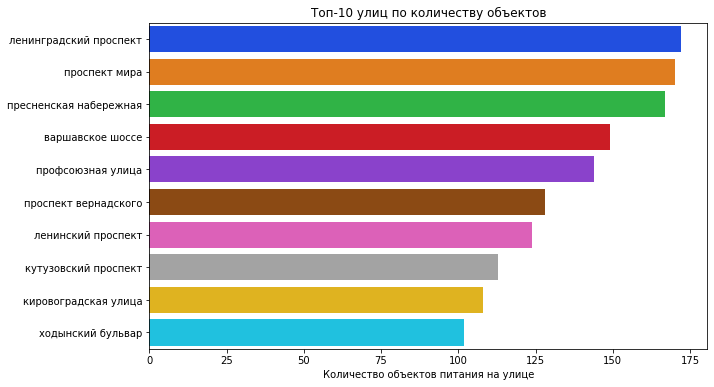

In [40]:
#чтобы найти топ-10 улиц с районами, вначале сгруппируем данные по улицам и посчитаем колличество объектов на них,
#отсортируем по убыванию методом .sort_values('id', ascending=False) и выберем 10 первых из них методом head(10) 
#а так как Зеленоград не имеет улиц, то исключим его из анализа также
top_street= (all_data.query('street != "город зеленоград"')
             .groupby('street')             
             .agg({'id':'count'})
             .sort_values('id', ascending=False)
             .reset_index(drop=False)
             .head(10))
top_street.columns=['street', 'count_rest']
#визуализируем полученные данные
fig, ax = plt.subplots(figsize=(10, 6))
ax = sns.barplot(y='street', x="count_rest", data=top_street)
ax.set_title('Топ-10 улиц по количеству объектов')
ax.set_xlabel('Количество объектов питания на улице')
ax.set_ylabel('')
plt.show()

In [41]:
#отбираем данные только для заведений с топ-10 улиц
top_street_data= all_data[all_data['street'].isin(top_street['street'])]
#аналогично улицам формируем сводную таблицу для районов
top_street_area= (top_street_data.groupby('area_right')
             .agg({'id':'count'})
             .sort_values('id', ascending=False)
             .reset_index(drop=False)
             )
top_street_area.columns=['distinct', 'count']
top_street_area

,distinct,count
0,Пресненский район,167
1,Хорошёвский район,136
2,район Чертаново Центральное,101
3,Тропарёво-Никулино район,69
4,район Коньково,62
5,район Свиблово,62
6,район Дорогомилово,61
7,район Фили-Давыдково,52
8,район Аэропорт,51
9,Алексеевский район,50


Получили,что топ-10 улиц находятся в 31 районе. Выберем 5-ку районов с наибольшим числом объектов, принадлежащих улицам топ-10 по количеству объектов. И 5-ку районов с наименьшим числом объектов, принадлежих улицам с большим числом объектов.

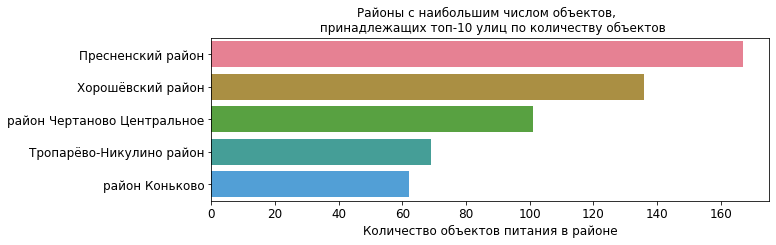

In [42]:
fig, ax = plt.subplots(figsize=(10, 3))
sns.set_palette ("husl")
ax = sns.barplot(y='distinct', x="count", data=top_street_area.head())
ax.set_title('Районы с наибольшим числом объектов,  \n принадлежащих топ-10 улиц по количеству объектов', fontsize=12)
ax.set_xlabel('Количество объектов питания в районе', fontsize=12)
plt.tick_params(axis='both', which='major', labelsize=12)
ax.set_ylabel('')
plt.show()

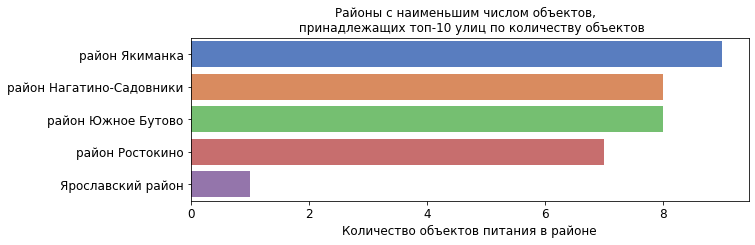

In [43]:
fig, ax = plt.subplots(figsize=(10, 3))
sns.set_palette("muted") 
#sns.set_palette("coolwarm") 
ax = sns.barplot(y='distinct', x="count", data=top_street_area.tail())
ax.set_title('Районы с наименьшим числом объектов,  \n принадлежащих топ-10 улиц по количеству объектов', fontsize=12)
ax.set_xlabel('Количество объектов питания в районе', fontsize=12)
plt.tick_params(axis='both', which='major', labelsize=12)
ax.set_ylabel('')
plt.show()

#### Вывод

Топ-10 улиц с наибольшим числом объектов питания входят в 31 район. Больше всего объектов улиц расположены в Пресненский(ЦАО), Чертаново Центральное(ЮАО) , Хорошёвский(ЮЗАО), Тропарёво-Никулино (ЗАО), Коньков(ЮЗАО) и Свиблово(СВАО) районах. Меньше всего объектов находятся в районах: Якиманка (ЦАО), Нагатино-Садовники(ЮАО), Южное Бутово(ЮЗАО), Ростокино(СВАО) и Ярославский(СВАО).
 Эти улицы достаточно длинные о проходят через многие округа Москвы, а следовательно захватывают и множество районов.

#### 3.6.  Число улиц с одним объектом общественного питания и определние в каких районах Москвы находятся эти улицы

In [44]:
#для подсчёта улиц с обним объектом группируем данные по названию улиц и считаем колличество заведений, принадлежащих им 
street=all_data.groupby('street').agg({'id':'count'}).sort_values('id', ascending=False)
#отбираем улицы с одним объектм
alone=street[street['id']==1]
#суммируем их количество
alone['id'].sum()

535

Получили,что у нас 535 улиц с одним объектом, выяснимкакому количеству районов они пренадлежат. 

In [45]:
#проводим аналогичные выкладки, как для районов с макисмальным числом объектом
top_street_area_alone= (all_data[all_data['street'].isin(alone.index)].groupby('area_right')
             .agg({'id':'count'})
             .sort_values('id', ascending=False)
             .reset_index(drop=False))
top_street_area_alone.columns=['distinct', 'count']
len(top_street_area_alone)

110

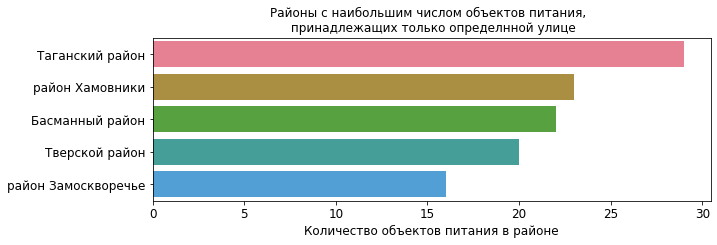

In [46]:
#выделяем 5-ку районов с максимальным количеством объектов, принадлежащих улицам с одним объектом 
fig, ax = plt.subplots(figsize=(10, 3))
sns.set_palette ("husl")
ax = sns.barplot(y='distinct', x="count", data=top_street_area_alone.head())
ax.set_title('Районы с наибольшим числом объектов питания,  \n принадлежащих только определнной улице', fontsize=12)
ax.set_xlabel('Количество объектов питания в районе', fontsize=12)
ax.set_ylabel('')
plt.tick_params(axis='both', which='major', labelsize=12)
plt.show()

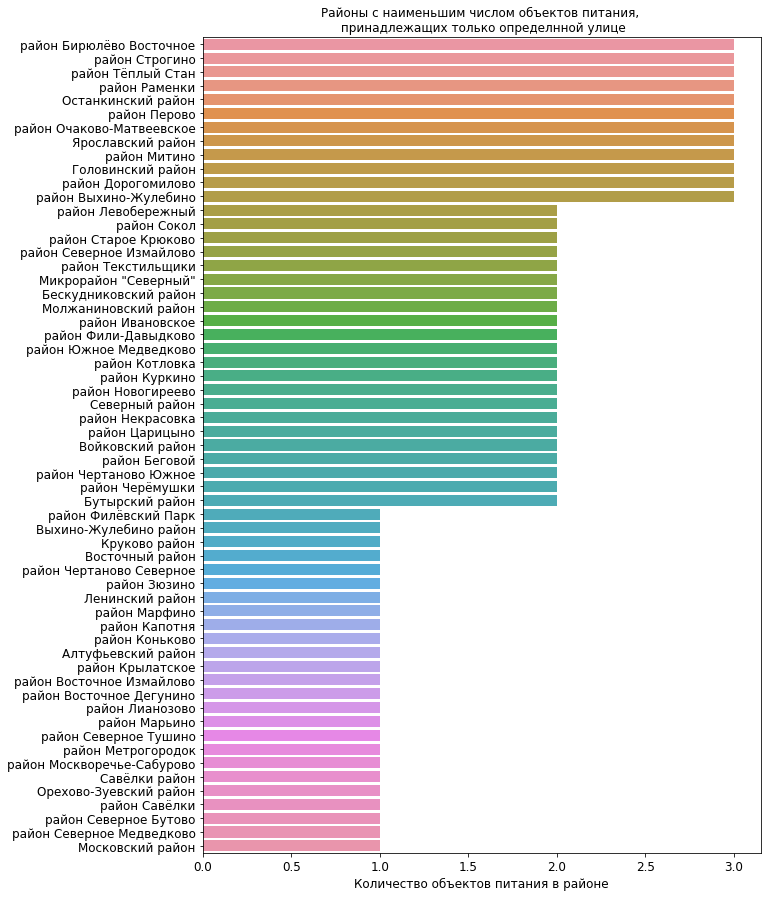

In [47]:
#выделяем районы с одним, двум или тремя объектами общественного питания, принадлежащих только определенной улице 
fig, ax = plt.subplots(figsize=(10, 15))
#sns.set_palette ("husl")
ax = sns.barplot(y='distinct', x="count", data=top_street_area_alone[top_street_area_alone['count'].isin([1,2,3])])
ax.set_title('Районы с наименьшим числом объектов питания, \n принадлежащих только определнной улице', fontsize=12)
ax.set_xlabel('Количество объектов питания в районе', fontsize=12)
ax.set_ylabel('')
plt.tick_params(axis='both', which='major', labelsize=12)
plt.show()

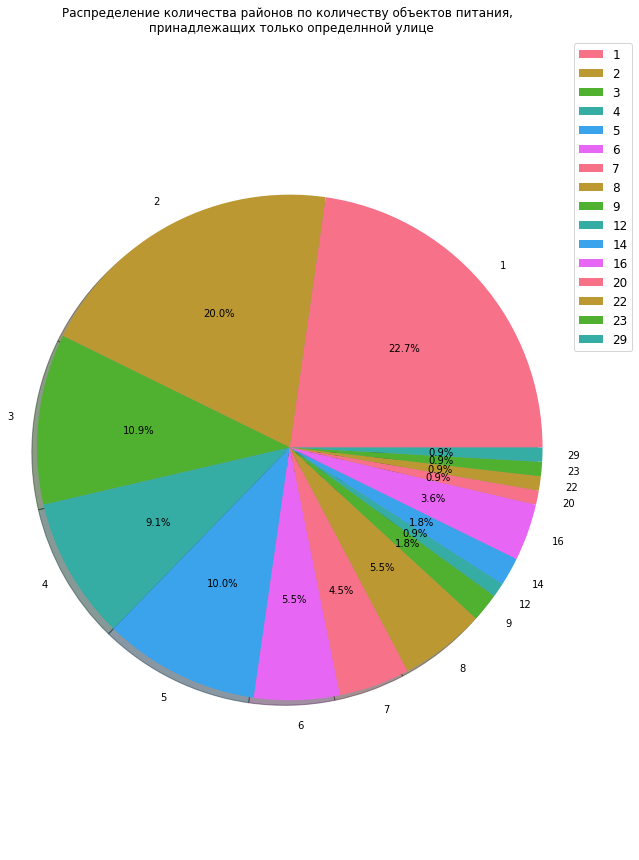

In [48]:
count_in_distinct= (top_street_area_alone.groupby('count')
             .agg({'distinct':'count'})
             .sort_values('count')
             .reset_index(drop=False))
count_in_distinct.columns=['count_object', 'count_distinct']
fig, ax = plt.subplots(figsize=(10, 15))
sns.set_palette ("husl")
ax.pie(count_in_distinct['count_distinct'], labels=count_in_distinct['count_object'],  autopct='%1.1f%%',shadow=True)
ax.axis("equal")
ax.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0), fontsize=12)
ax.set_title('Распределение количества районов по количеству объектов питания, \n принадлежащих только определнной улице', fontsize=12)
plt.show()

#### Вывод

Существует 535 улиц с одним объектом общественного питания, которые располагаются в 110 районах.  Наибольшее число объектов таких улиц содержат следующие районы: Таганский(ЦАО), Хамовники(ЦАО), Басманный(ЦАО), Тверской(ЦАО) и Замоскворечье(ЦАО). Такая закономерность может быть связана с тем, что в центре ЦАО располагаются много небольших по длине улиц, проездов, площадей, кварталлов или переулоков в виду большого количества построек на небольшой территории.  
25-ть районов содержат только один объект общественного питания, который располагается на определенной улице, а более 50%  районов содержат от 1 до 3 объектов питания, располагающихся в большинстве случаев на улицах близ МКАДа или за ним.

#### 3.7. Распределение количества посадочных мест для улиц с большим количеством объектов общественного питания 

Последним этапом анализа является рассмотрение распределения посадочных мест для улиц с большим количеством объектов общественного питания. Для этого выделим строки, которые соответствуют улицам топ-10, а затем построим графики разброса точек и boxplot.

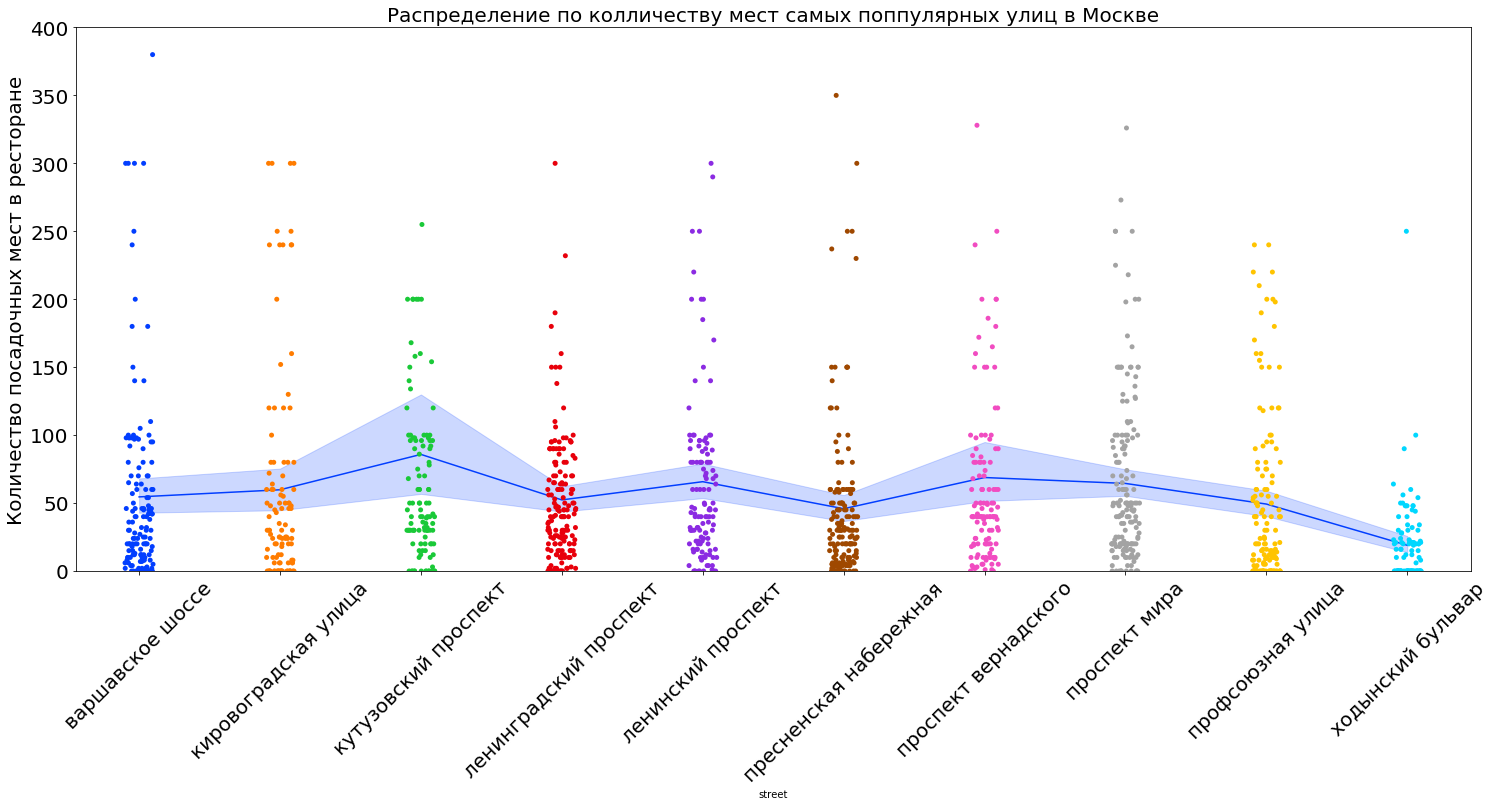

In [49]:
top_street_rest=all_data[all_data['street'].isin(top_street['street'])].sort_values('street')
sns.set_palette("bright")
fig, ax =  plt.subplots(figsize=(25 , 10))
sns.stripplot(x="street", y="number", data=top_street_rest)
ax.set_xlabel("") 
ax.set_ylabel('Количество посадочных мест в ресторане', fontsize=20)
ax.set_title('Распределение по колличеству мест самых поппулярных улиц в Москве', fontsize=20)  
ax.set_ylim(ymin=0, ymax=400) 
sns.lineplot(y=top_street_rest['number'].values,x=top_street_rest['street'],ax=ax)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.xticks(rotation=45)
plt.show()

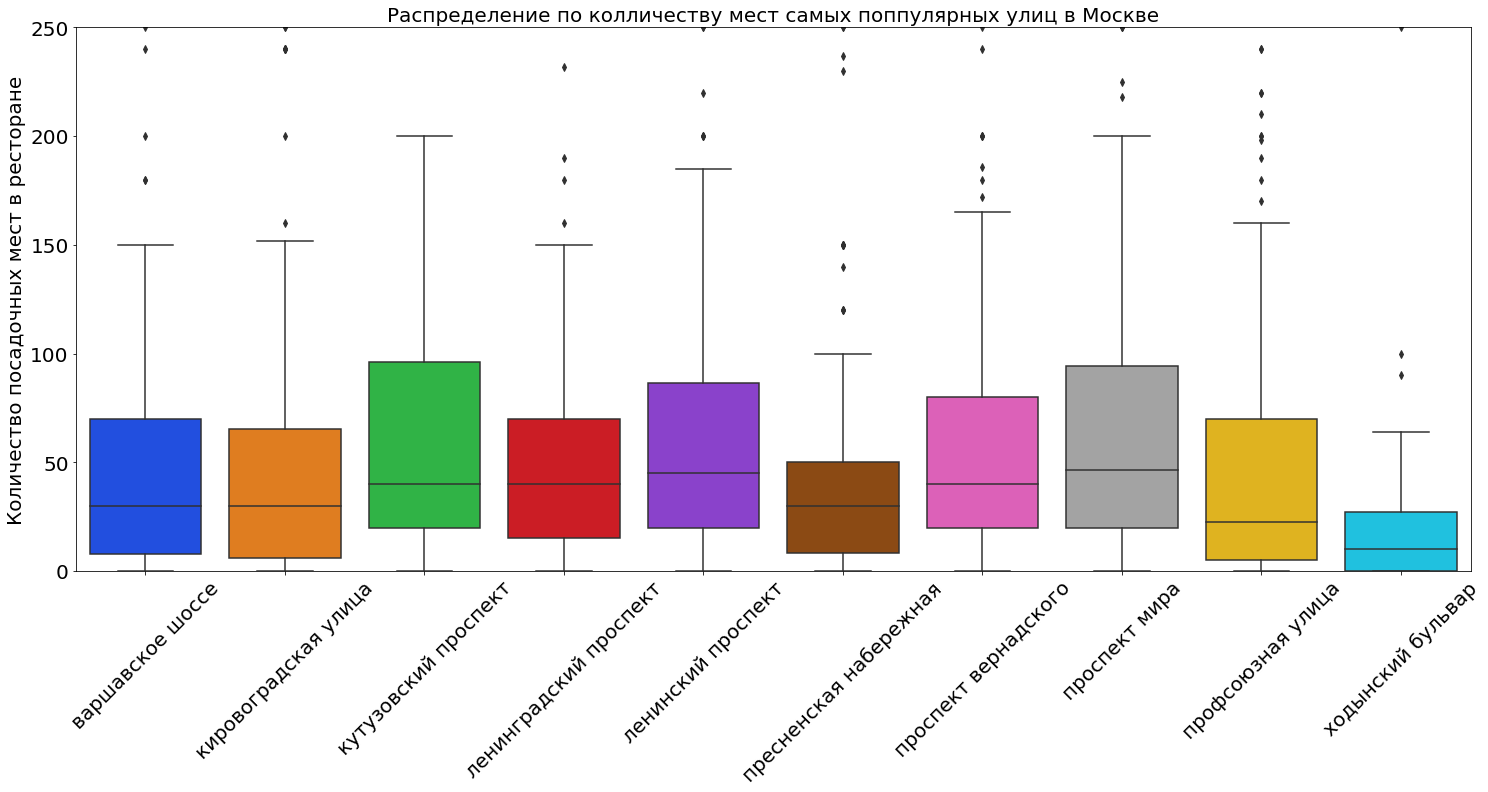

In [50]:
sns.set_palette("bright")
fig, ax =  plt.subplots(figsize=(25 , 10))
sns.boxplot(x="street", y="number", data=top_street_rest)
ax.set_xlabel("") 
ax.set_ylabel('Количество посадочных мест в ресторане', fontsize=20)
ax.set_title('Распределение по колличеству мест самых поппулярных улиц в Москве', fontsize=20)  
ax.set_ylim(ymin=0, ymax=250) 
plt.tick_params(axis='both', which='major', labelsize=20)
plt.xticks(rotation=45)
                
plt.show()

##### Вывод

Для улиц с максимальным числом объектов в среднем наблюдается 34 посадочных мест. В заведениях, расположенных вдоль проспектов, посадочных мест больше, чем в заведениях, расположенных на улицах, набережных или шоссе.Минимальный разброс мест наблюдается на Ходынском бульваре при среднем значении 18 мест.

### Вывод

Рекомендации о виде заведения: Самыми популярными видами объектов общественного питания являются кафе, рестораны и столовые. Однако, столовые нам не подойдут, так как мы коммерческая организация, а не государственные объединения какого-либо типа.   Можно открыть ресторан, если мы будем располагаться в центре Москвы, где люди могут позволить себе высокий чек, но России преобладает население с средним доходом и низким доходом, поэтому большинство людей предпочитают недорогую еду. Вследствие этого достаточно много открыто заведений фастфуда, однако в наше время идёт культ "Здорового образа жизни" и люди стараются питаться правильно и есть более полезную пищу. Таким образом, выбор падает на кафе, как тип будущего заведения. К тому же данный тип популярен, как среди сетевых, так и несетевых заведений. 

Рекомендации о количестве посадочных мест: Рекомендуемо число посадочных мест в кафе должно быть от 30 до 40 (оптимальное количество - 35 мест). Такое число соответсвует среднему числу посадочных мест среди улиц с максимальным числом объектов питания и среднему числу среди самых топовых сетевых заведений города Москвы.

Рекомендация о районе расположения: Стоит начинать с открытия кафе в районе, на котором расположены улицы с достаточно малым числом объектов и находящихся довольно близко к центру: Таганский(ЦАО), Хамовники(ЦАО) или Якиманка(ЦАО), но улицы стоит выбрать ближе к ТТК, чтобы не платить высокую аренду и ставить либеральные цены, поэтому Таганский и Тверской районы нам не подойдут.
Как только кафе "встанет на ноги", можно попробовать открыть новое заведение в районах с большей конкуренцией и большим количеством потенциальных клиентов: район Чертаново Центральное или Хорошёвский, через которые проходят улицы с большим числом различных типов объектов.

Презентация: https://drive.google.com/file/d/1BitkMS1q7ZPSj4R3LqBoOT_01s0KTpVI/view?usp=sharing